# EDA

### As long as all 5 files (from Data Sets folder) are downloaded, Final_Notebook.ipynb can be run smoothly (same directory as Final_Notebook.ipynb)

## Question 1

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import statsmodels.formula.api as sm
np.random.seed(102)

In [2]:
nba_2023 = pd.read_csv('nba_2023_season.csv')
nba_2023

,RANK,NAME,TEAM,POS,AGE,GP,MPG,USG%,TO%,FTA,...,APG,SPG,BPG,TPG,P+R,P+A,P+R+A,VI,ORtg,DRtg
0,1,Bradley Beal,Was,G,29.8,50,33.5,29.2,14.2,228,...,5.4,0.9,0.7,2.9,27.1,28.6,32.5,9.4,113.9,113.7
1,2,Kristaps Porzingis,Was,F-C,27.7,65,32.6,27.4,11.8,416,...,2.7,0.9,1.5,2.1,31.6,25.8,34.2,9.9,121.8,107.3
2,3,Kyle Kuzma,Was,F,27.7,64,35.0,27.9,14.3,237,...,3.7,0.6,0.5,3.0,28.4,24.9,32.2,9.4,102.8,111.7
3,4,Rui Hachimura,Was,F,25.2,30,24.3,23.0,10.0,58,...,1.2,0.4,0.4,1.2,17.3,14.2,18.4,6.7,106.2,113.8
4,5,Corey Kispert,Was,F,24.1,74,28.3,14.1,8.7,88,...,1.2,0.4,0.1,0.8,13.9,12.3,15.1,4.7,124.2,116.6
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
604,605,Frank Kaminsky,Atl,F-C,30.0,26,6.8,13.9,16.9,12,...,0.8,0.2,0.0,0.3,4.1,3.5,4.9,8.5,132.5,105.8
605,606,Trent Forrest,Atl,G,24.8,23,12.0,11.6,19.9,3,...,1.7,0.3,0.1,0.7,3.9,3.9,5.5,6.1,93.2,114.2
606,607,Donovan Williams,Atl,G,21.6,2,2.2,48.8,0.0,0,...,0.0,0.0,0.0,0.0,3.0,2.0,3.0,0.0,NaN,NaN
607,608,Tyrese Martin,Atl,G,24.1,16,4.1,16.6,7.9,2,...,0.1,0.1,0.0,0.1,2.1,1.4,2.2,4.6,98.8,118.4


Legend: 
    
RANK: Player Rank based off overall statistical performance. </br></br>
NAME: Name of the player. </br></br>
TEAM: The NBA team the player plays for. </br></br>
POS: Position of the player. </br></br>
AGE: Age of the player in years. </br></br>
GP: Games Played. </br></br>
MPG: Minutes per game. </br></br>
USG%: Usage rate, a.k.a., usage percentage is an estimate of the percentage of team plays used by a player while he was on the floor. </br></br>
TO%: A metric that estimates the number of turnovers a player commits per 100 possessions </br></br>
FTA: number of free throws Attempted. </br></br>
FT%: Percentage of free throws made. </br></br>
2PA: Number of 2 point shots attempted. </br></br>
2P%: 2 Point shot percentage. </br></br>
3PA: Number of 3 point shots attempted. </br></br>
3P%: Percentage of 3 point shots. </br></br>
eFG%: With eFG%, three-point shots made are worth 50% more than two-point shots made. eFG% Formula=(FGM+ (0.5 x 3PM))/FGA </br></br>
TS%: True shooting percentage is a measure of shooting efficiency that takes into account field goals, 3-point field goals, and free throws </br></br>
PPG: Number of Points per game. </br></br>
RPG: Number of Rebounds per game. </br></br>
APG: Number of assists per game. </br></br>
SPG: Number of steals per game. </br></br>
BPG: Number of blocks per game. </br></br>
TPG: Number of Turnovers per game.  </br></br>
P+R: Number of Points and Rebounds. </br></br>
P+A: Number of Points and Assists. </br></br>
P+R+A: Number of Points, Rebounds, and Assists </br></br>
VI: The versatility index is a metric that measures a player’s ability to produce in points, assists, and rebounds. The average player will score around a five on the index, while top players score above 10 </br></br>
ORtg: Individual offensive rating is the number of points produced by a player per 100 total individual possessions </br></br>
DRtg: Individual defensive rating estimates how many points the player allowed per 100 possessions he individually faced while staying on the court. </br></br>

For our analysis, we don't need the player name or team, since these are categorical variables that will not help us in any way.

In [3]:
nba_2023.drop(columns = ['NAME', 'TEAM'], inplace = True)

We also drop the P+R, P+A, P+R+A columns since those are linear combinations of existing columns and therefore give us no additional information.

In [4]:
nba_2023.drop(columns = ['P+R', 'P+A', 'P+R+A'], inplace = True)

In [5]:
# create the minutes played and games played threshold

nba_2023 = nba_2023[(nba_2023['GP'] >= 21) & (nba_2023['MPG'] >= 12)]

In [6]:
# creating a per-game column for 3PA by dividing by games played (GP)

nba_2023.rename(columns = {'3PA': '3PA_total'}, inplace = True)
nba_2023['3PA'] = np.round(nba_2023['3PA_total'].values / nba_2023['GP'].values, 1)
nba_2023.drop(columns = ['3PA_total'], inplace = True)

/opt/conda/lib/python3.9/site-packages/pandas/core/frame.py:5039: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return super().rename(
/tmp/ipykernel_243/440347401.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  nba_2023['3PA'] = np.round(nba_2023['3PA_total'].values / nba_2023['GP'].values, 1)
/opt/conda/lib/python3.9/site-packages/pandas/core/frame.py:4906: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#ret

Text(0.5, 1.0, '3PA vs. PPG')

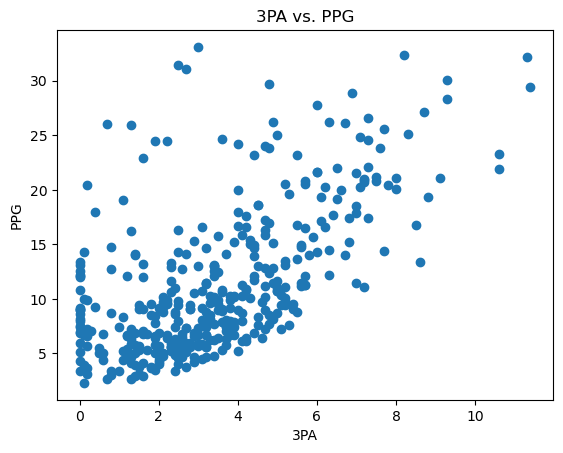

In [7]:
# seeing if 3 point attempts is generally correlated with points scored 

plt.scatter(nba_2023['3PA'], nba_2023['PPG'])
plt.xlabel('3PA')
plt.ylabel('PPG')
plt.title('3PA vs. PPG')

In [8]:
nba_2023[['3PA', 'PPG']].corr()

,3PA,PPG
3PA,1.000000,0.615261
PPG,0.615261,1.000000


As we can see above, our 3PA and PPG have a positive linear correlation, which (at least for the time being) tells us that there is certainly a relationship here. This is not particularly surprising, as shooting shots that have more value if converted would intuitively mean a player is going to score more points. This tells us that exploring the causal impact of 3PA on PPG has some merit, considering the association.

As for any opportunities for further exploration, it would likely be worth exploring whether or not shooting more 3s leads to more points, as opposed to shooting less 3s but opting for higher percentage 2 point shots. Essentially, this question would be testing whether or not the fact that 3 > 2 offsets the lower probability of making said shot in terms of total points scored.

Another useful thing for us to plot is whether or not position can be used as a variable:

There are 3 position groupings in basketball: guard (G), forward (F), and center (C). Additionally, some players are listed as being more than one position:

In [9]:
nba_2023['POS'].value_counts()

G      155
F      113
G-F     37
F-C     30
C       30
F-G     17
C-F     15
Name: POS, dtype: int64

We want to make sure this column is numerical, so we will have to binarize. In order to account for those who play multiple positions, we will make each of those combinations their own position group. This will ensure each player only has a single 1 for any of our dummy variables, and is also likely to be more reflective of the fact that someone who can play different positions likely deserves a different categorization.

In [10]:
dummy_pos = pd.get_dummies(nba_2023['POS'])
nba_2023.drop(columns = ['POS'], inplace = True)
nba_2023 = pd.concat([nba_2023, dummy_pos], axis = 1)

/opt/conda/lib/python3.9/site-packages/pandas/core/frame.py:4906: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return super().drop(


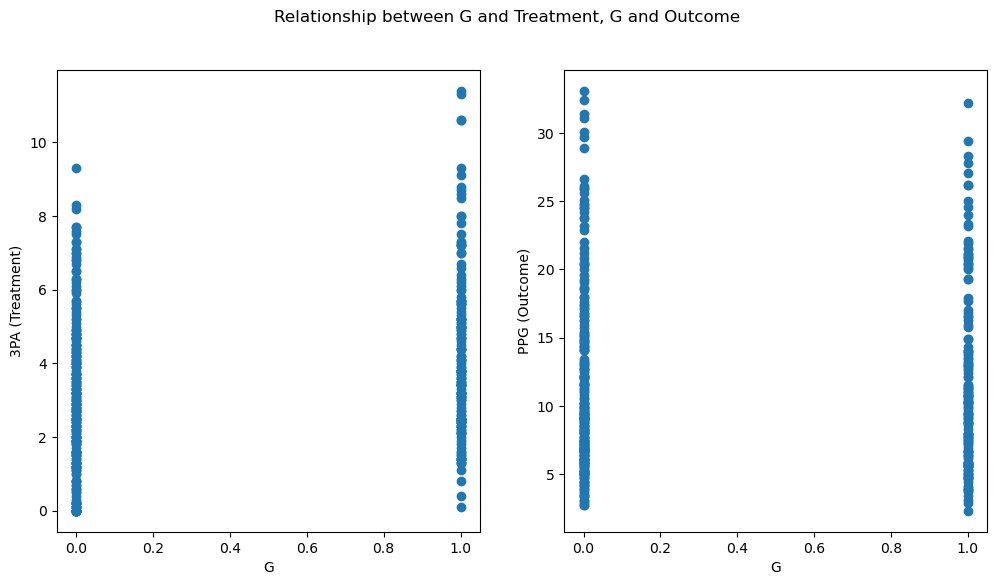

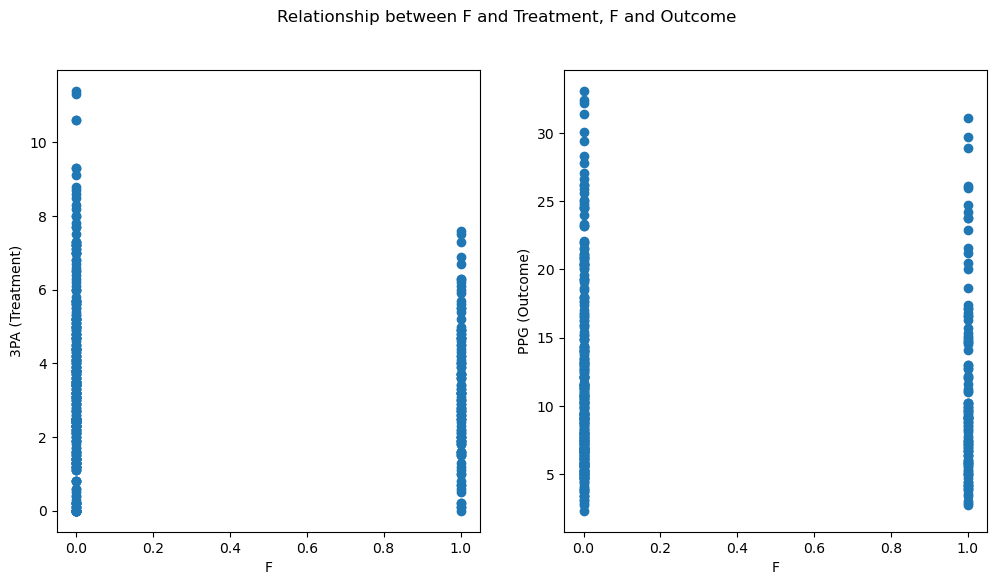

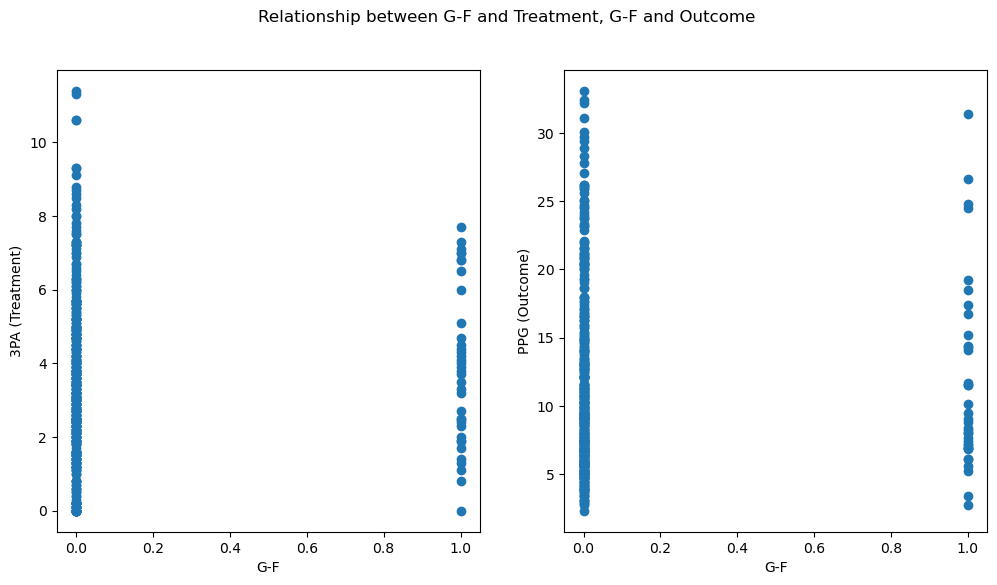

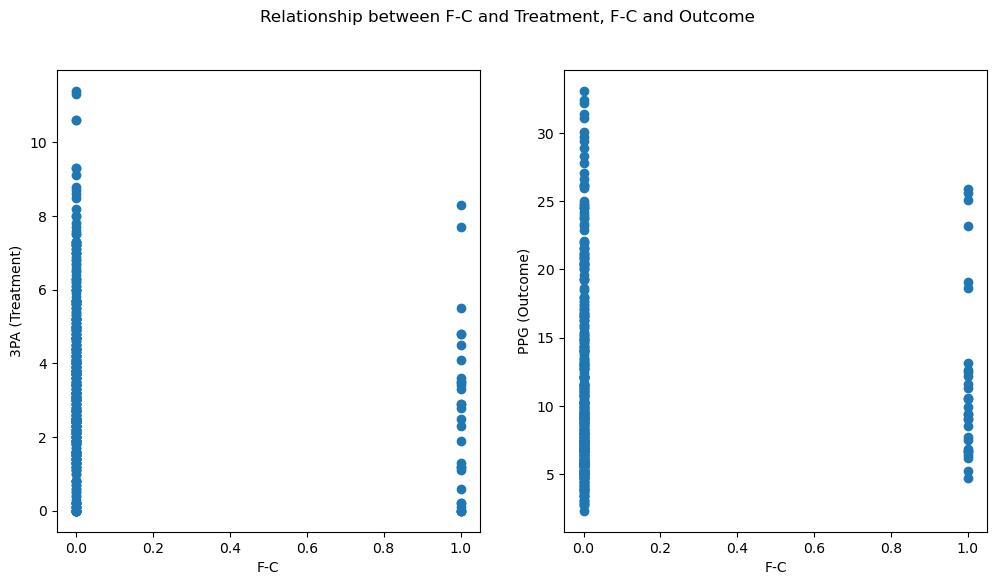

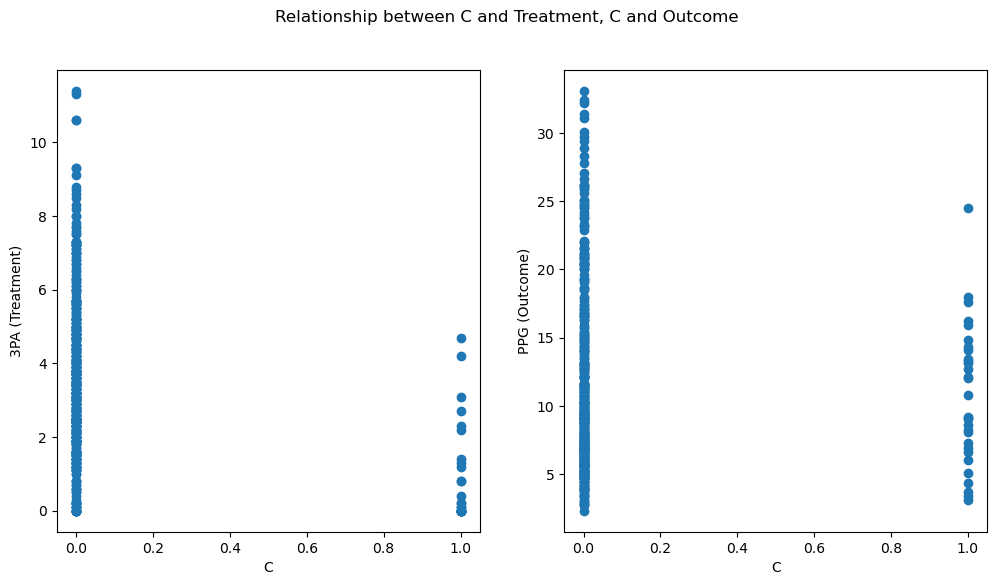

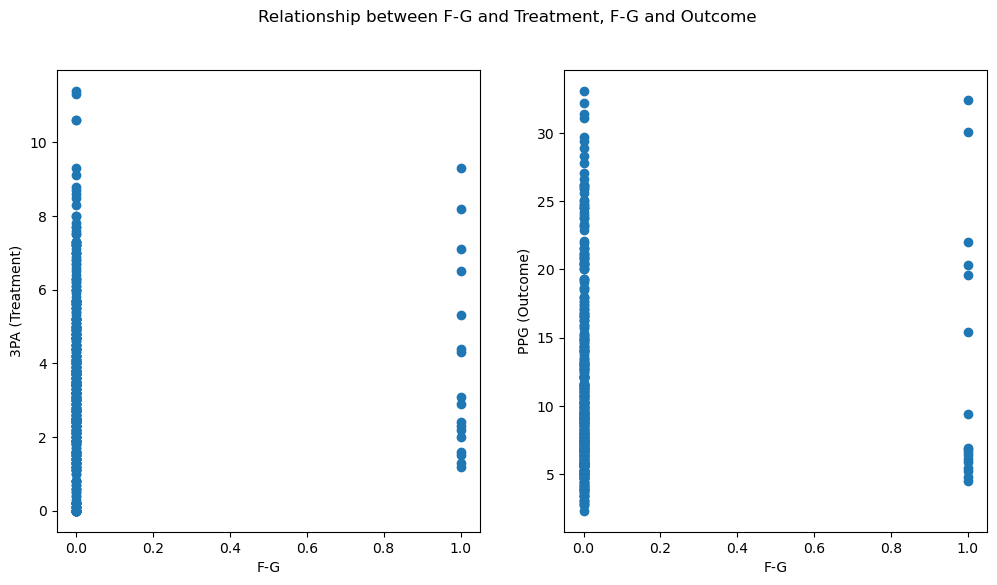

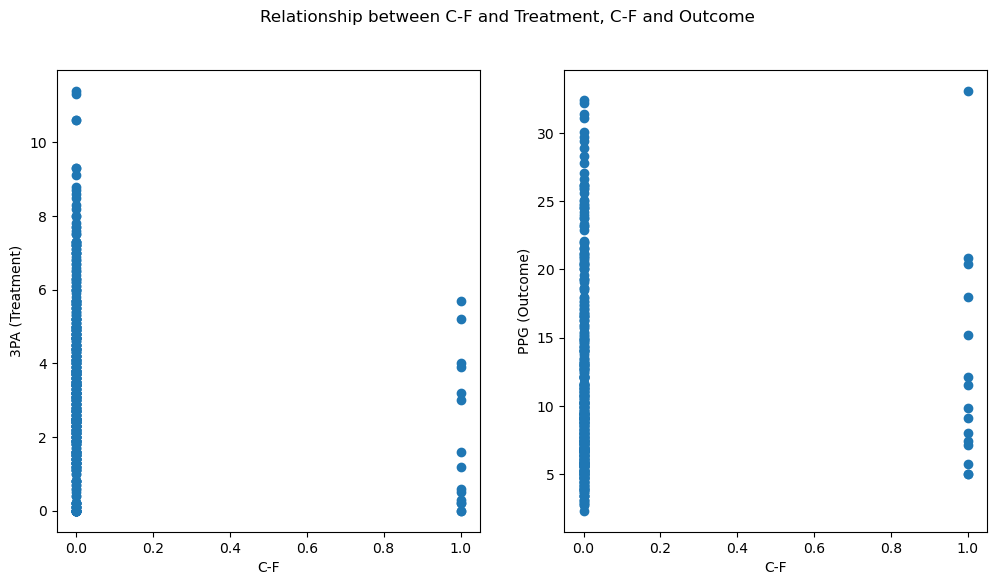

In [11]:
def plot_treatment_outcome_position(position):
    fig, sbp = plt.subplots(ncols=2, figsize=(12, 6))
    ax0 = sbp[0] 
    ax1 = sbp[1]
    fig.suptitle(f'Relationship between {position} and Treatment, {position} and Outcome')
    
    # plotting the treatment and confounder correlation 
    ax0.set_xlabel(position)
    ax0.set_ylabel('3PA (Treatment)')
    s = ax0.scatter(nba_2023[position], nba_2023['3PA'])
    
    # plotting the outcome and confounder correlation
    ax1.set_xlabel(position)
    ax1.set_ylabel('PPG (Outcome)')
    s = ax1.scatter(nba_2023[position], nba_2023['PPG'])
    

positions = ['G', 'F', 'G-F', 'F-C', 'C', 'F-G', 'C-F']

for position in positions:
    plot_treatment_outcome_position(position)

As we can see above, there do seem to be some interesting relationships here with our positions and our treatment and outcome. What this tells us is the potential efficacy of some of the positions as confounding variables. Since F, F-G, G, G-F are missing a linear relationship with both of the treatment and outcome (or one of the relationships is extraordinarily weak), so they are likely bad choices for confounders in our model. C-F and C are the only ones that have strong relationships with one of or both (the other non-strong still being passable), and are likely our best choices for choosing a confounder for our outcome regression model. 

As for further research, some more insight on the amount of time a player spends at a given position would be helpful. We could therefore create a new category where we weight the time someone spends at a position, as it would be more telling than a binary variable for the position.

## Question 2

In [12]:
team_metrics = pd.read_csv("2023_team_metrics")
nba_2023 = pd.read_csv('nba_2023_season.csv')
team_metrics

,RANK,TEAM,CONF,DIVISION,GP,PPG,oPPG,pDIFF,PACE,oEFF,...,SAR,CONS,A4F,W,L,WIN%,eWIN%,pWIN%,ACH,STRK
0,1,Milwaukee,East,Central,82,116.9,113.3,3.6,100.5,115.5,...,3.16,15.0,0.086,58,24,0.707,0.595,0.619,0.112,-2
1,2,Boston,East,Atlantic,82,117.9,111.4,6.5,98.4,118.1,...,5.76,14.3,0.063,57,25,0.695,0.677,0.714,0.018,3
2,3,Philadelphia,East,Atlantic,82,115.2,110.9,4.3,96.8,117.8,...,4.51,13.3,0.021,54,28,0.659,0.629,0.642,0.030,2
3,4,Denver,West,Northwest,82,115.8,112.5,3.3,98.1,117.6,...,2.84,14.3,0.058,53,29,0.646,0.594,0.609,0.052,1
4,5,Cleveland,East,Central,82,112.3,106.9,5.4,95.6,116.2,...,4.57,12.9,0.004,51,31,0.622,0.667,0.678,-0.045,-1
5,6,Memphis,West,Southwest,82,116.9,113.0,3.9,101.0,115.1,...,3.31,14.7,0.007,51,31,0.622,0.602,0.628,0.020,-1
6,7,Sacramento,West,Pacific,82,120.8,118.1,2.7,100.3,119.5,...,2.11,13.5,0.006,48,34,0.585,0.577,0.589,0.008,-3
7,8,New York,East,Atlantic,82,116.0,113.1,2.9,97.1,117.8,...,2.88,13.0,0.021,47,35,0.573,0.589,0.595,-0.016,-2
8,9,Brooklyn,East,Atlantic,82,113.4,112.5,0.9,98.3,115.0,...,0.75,15.6,0.036,45,37,0.549,0.521,0.530,0.028,-1
9,10,Phoenix,West,Pacific,82,113.6,111.6,2.0,98.2,115.2,...,2.44,15.2,-0.001,45,37,0.549,0.555,0.566,-0.006,-2


GP: Games played </br></br>
PPG: Points Scored Per Game</br></br>
oPPGPoints Allowed Per Game</br></br>
pDIFF: Points Differential = [(Total Points Scored) – (Total Points Allowed)]/ (Games Played)</br></br>
PACE: Pace, an estimate of Possessions Per 48 Minutes</br></br>
oEFF: Offensive Efficiency, points scored per 100 possessions</br></br>
dEFF: Defensive Efficiency, points allowed per 100 possessions</br></br>
eDIFF: Efficiency Differential = [(Total Offensive Efficiency) – (Total Defensive Efficiency)]/ (Games Played)</br></br>
SOS: Strength of the Schedule Opponent efficiency differential average for all games played so far (venue of the games also taken into account) is used as an indicator of the strength of the schedule. The higher the SoS rating, the tougher the schedule; where zero is average</br></br>
rSOS: Remaining Strength of the Schedule Opponent efficiency differential average for the remaining games (venue of the games also taken into account) is used as an indicator of the strength of the schedule. The higher the rSOS rating, the tougher the remaining schedule; where zero is average</br></br>
SAR: Schedule Adjusted Rating An evaluation of teams based on efficiency differential and strength of schedule
CONS: Consistency Rating Consistency based on game-by-game efficiency differential variation. The higher the team has consistency rating, the more unpredictable it is</br></br>
a4F: Adjusted Four Factors, calculated by applying weights to the differentials of offensive and defensive four factors. A4F explains the specified proportion of variability in wins</br></br>
W: Wins: The most important goal in sports unless your team is not tanking</br></br>
L: Losses: Total number of games lost</br></br>
W%: Winning percentage</br></br>
eWIN%: Correlated Gaussian Expected Winning Percentage, indicates the ideal winning percentage based on offensive and defensive performance</br></br>
pWIN%: Projected Winning Percentage, each point differential translates to 2.7 wins over the course of the season</br>
ACH: Achievement Level In Terms of Wins, this metric is based on the differential between actual and expected winning percentages. Positive figures indicate overachievement while negative figures indicate the team should have won more games.</br></br>
STRK: Current Streak, winning or losing streak for the season</br>

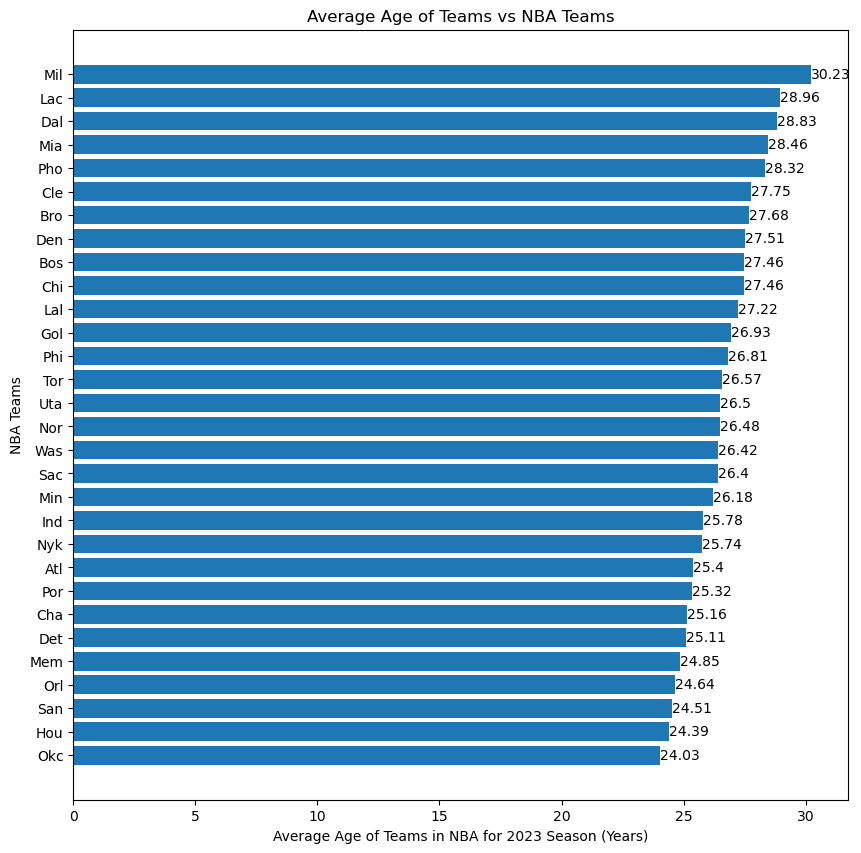

In [13]:
age_team = nba_2023.groupby('TEAM').mean('AGE').sort_values('AGE')
fig1 = plt.figure(figsize= [10,10])
nba_age_team = plt.barh(width = age_team['AGE'], y = age_team['AGE'].index)
plt.bar_label(container = nba_age_team, labels = np.round(age_team['AGE'], 2))
plt.ylabel("NBA Teams")
plt.xlabel('Average Age of Teams in NBA for 2023 Season (Years)')
plt.title('Average Age of Teams vs NBA Teams')
plt.show()

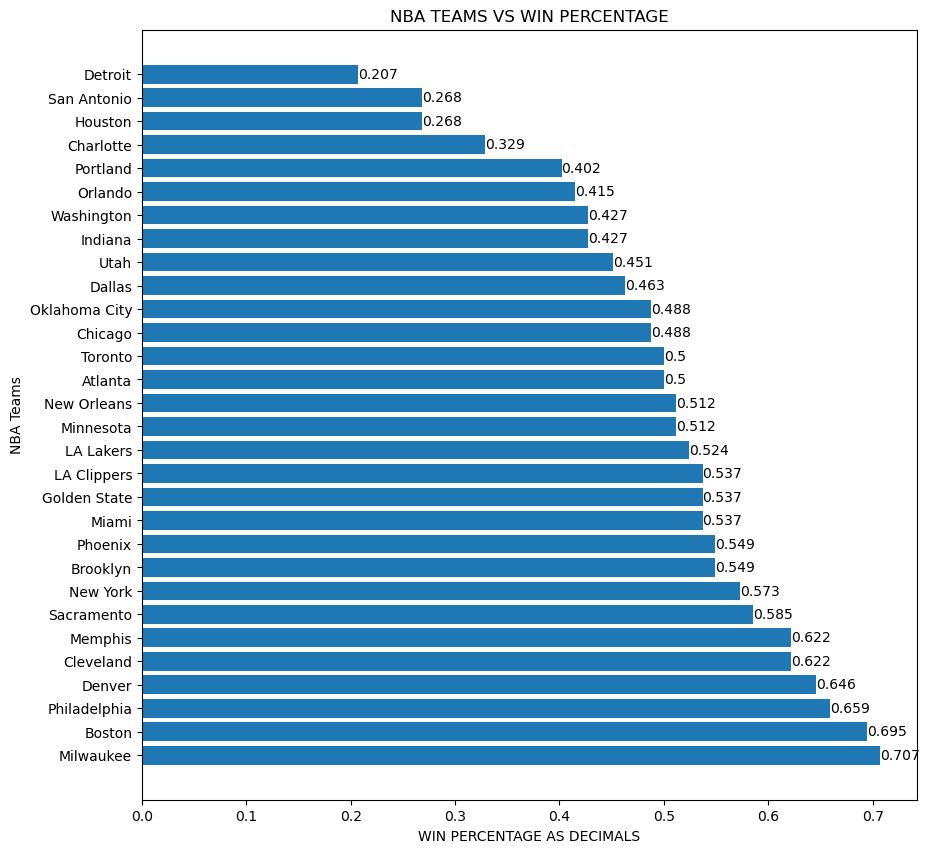

In [14]:
team_wins = team_metrics[['TEAM','WIN%']]

fig2 = plt.figure(figsize= [10,10])
team_win_plot = plt.barh(width = team_wins['WIN%'], y = team_wins['TEAM'])
plt.bar_label(container = team_win_plot, labels = team_wins['WIN%'])
plt.ylabel("NBA Teams")
plt.xlabel('WIN PERCENTAGE AS DECIMALS')
plt.title('NBA TEAMS VS WIN PERCENTAGE')
plt.show()

As we can see, there is a good sized difference in the ages, which would likely indicate that the age of a team is going to be a good variable for us to use. 

As for further analysis with age, a weighting of age by minutes played, for example, would give us a better indication, since a 40 year old player who plays 0 minutes per game is going to be accounted for in a team's average age, but doesn't actuall have an on the court impact. This would allow us to get more information from our age variable.

As for the win percentage, we see that there is a somewhat direct relationship for win percentage and age; for example, Milwaukee is one of the older teams in the league, and has a higher win percentage. This again validates that this would be a good variable for us. 

We likely don't need more data on win percentage since it is a fairly cut and dry statistic without much more context needed for our purposes.

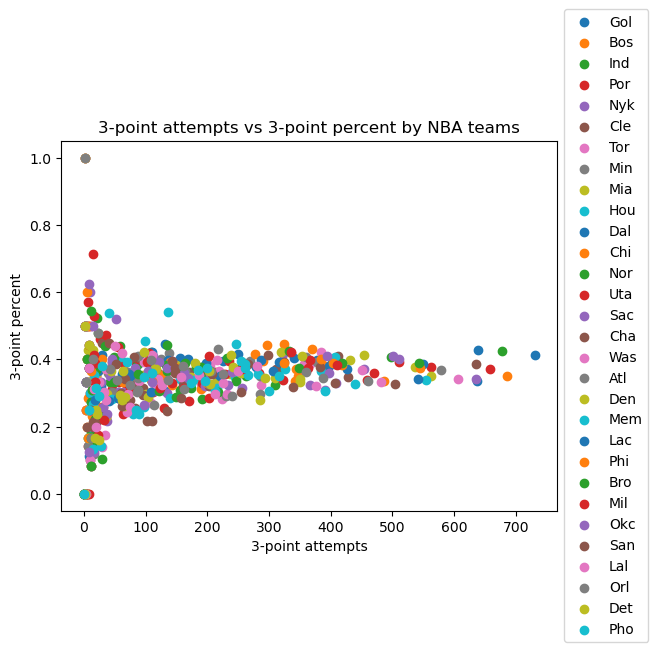

In [15]:
#Highest three point attempts in 2023 season
three_attempts = nba_2023[['NAME', 'TEAM', 'POS','3PA', '3P%','PPG']].sort_values('3PA', ascending = False)

#Highest average points per game in 2023 season
points_per_game = nba_2023[['NAME', 'TEAM', 'POS','3PA', '3P%','PPG']].sort_values('PPG', ascending = False)

for t in three_attempts['TEAM'].unique():
    x_axis = three_attempts.loc[three_attempts['TEAM'] == t]['3PA']
    y_axis = three_attempts.loc[three_attempts['TEAM'] == t]['3P%']
    plt.scatter(x = x_axis, y = y_axis, label = t)
    plt.xlabel('3-point attempts')
    plt.ylabel('3-point percent')
    plt.title('3-point attempts vs 3-point percent by NBA teams')
    plt.legend(loc='center left', bbox_to_anchor=(1, 0.5))

Looking at the chart above, this tells us that 3-point percentage is normally distributed around 0.35. This means that on average, most nba players hit 1/3 of their 3-point shots and only a relatively small percentage of players have over 400 3-point attempts. This is likely due to the strategy to give the ball to their best three-point shooter (generally, but not always a star player). For example, the top 3 point attempted shooters include Jayson Tatum, Steph Curry, Damian Lillard are all the face of their respective teams but this list also includes the supporting cast like Buddy Hield and Jordan Poole.

In [16]:
renamed_for_ols = three_attempts.rename(columns={'3PA':'three_attempts','3P%':'three_percent'})
model1 = sm.ols('PPG ~ three_attempts + three_percent', data = renamed_for_ols)
results = model1.fit()
print(results.summary())

                            OLS Regression Results                            
Dep. Variable:                    PPG   R-squared:                       0.487
Model:                            OLS   Adj. R-squared:                  0.486
Method:                 Least Squares   F-statistic:                     288.0
Date:                Wed, 10 May 2023   Prob (F-statistic):           1.23e-88
Time:                        23:38:36   Log-Likelihood:                -1824.0
No. Observations:                 609   AIC:                             3654.
Df Residuals:                     606   BIC:                             3667.
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
                     coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------
Intercept          4.3624      0.480      9.

The p-values of the intercept and three point attempts are 0 which indicate that the data is statistically significant at the 1% level (and 5% level). This means that we reject the null hypothesis for a significance test at 1% and we can be 99% confident that three point attempts and three point percentage have a significant effect on variable of interest: points per game. Since F-stat is 288 and > 10, this indicates it's a strong model and has significant explanatory power. 

This is significant since it reveals that 3-point percentage will not be a good explanatory independent variable. This is likely cause of low volume 3-point attempts from shooters that can hit their shots, making their 3-point percentage 1 (100% shots made) or close to it. 

### Question 1: Does shooting more 3s actually mean scoring more points? 

In [17]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import statsmodels.api as sm

In [18]:
nba_2023 = pd.read_csv("nba_2023_season.csv")
nba_2023.head(5)

,RANK,NAME,TEAM,POS,AGE,GP,MPG,USG%,TO%,FTA,...,APG,SPG,BPG,TPG,P+R,P+A,P+R+A,VI,ORtg,DRtg
0,1,Bradley Beal,Was,G,29.8,50,33.5,29.2,14.2,228,...,5.4,0.9,0.7,2.9,27.1,28.6,32.5,9.4,113.9,113.7
1,2,Kristaps Porzingis,Was,F-C,27.7,65,32.6,27.4,11.8,416,...,2.7,0.9,1.5,2.1,31.6,25.8,34.2,9.9,121.8,107.3
2,3,Kyle Kuzma,Was,F,27.7,64,35.0,27.9,14.3,237,...,3.7,0.6,0.5,3.0,28.4,24.9,32.2,9.4,102.8,111.7
3,4,Rui Hachimura,Was,F,25.2,30,24.3,23.0,10.0,58,...,1.2,0.4,0.4,1.2,17.3,14.2,18.4,6.7,106.2,113.8
4,5,Corey Kispert,Was,F,24.1,74,28.3,14.1,8.7,88,...,1.2,0.4,0.1,0.8,13.9,12.3,15.1,4.7,124.2,116.6


In [19]:
nba_2023.columns

Index(['RANK', 'NAME', 'TEAM', 'POS', 'AGE', 'GP', 'MPG', 'USG%', 'TO%', 'FTA',
       'FT%', '2PA', '2P%', '3PA', '3P%', 'eFG%', 'TS%', 'PPG', 'RPG', 'APG',
       'SPG', 'BPG', 'TPG', 'P+R', 'P+A', 'P+R+A', 'VI', 'ORtg', 'DRtg'],
      dtype='object')

Legend: 
    
RANK: Player Rank based off overall statistical performance. </br></br>
NAME: Name of the player. </br></br>
TEAM: The NBA team the player plays for. </br></br>
POS: Position of the player. </br></br>
AGE: Age of the player in years. </br></br>
GP: Games Played. </br></br>
MPG: Minutes per game. </br></br>
USG%: Usage rate, a.k.a., usage percentage is an estimate of the percentage of team plays used by a player while he was on the floor. </br></br>
TO%: A metric that estimates the number of turnovers a player commits per 100 possessions </br></br>
FTA: number of free throws Attempted. </br></br>
FT%: Percentage of free throws made. </br></br>
2PA: Number of 2 point shots attempted. </br></br>
2P%: 2 Point shot percentage. </br></br>
3PA: Number of 3 point shots attempted. </br></br>
3P%: Percentage of 3 point shots. </br></br>
eFG%: With eFG%, three-point shots made are worth 50% more than two-point shots made. eFG% Formula=(FGM+ (0.5 x 3PM))/FGA </br></br>
TS%: True shooting percentage is a measure of shooting efficiency that takes into account field goals, 3-point field goals, and free throws </br></br>
PPG: Number of Points per game. </br></br>
RPG: Number of Rebounds per game. </br></br>
APG: Number of assists per game. </br></br>
SPG: Number of steals per game. </br></br>
BPG: Number of blocks per game. </br></br>
TPG: Number of Turnovers per game.  </br></br>
P+R: Number of Points and Rebounds. </br></br>
P+A: Number of Points and Assists. </br></br>
P+R+A: Number of Points, Rebounds, and Assists </br></br>
VI: The versatility index is a metric that measures a player’s ability to produce in points, assists, and rebounds. The average player will score around a five on the index, while top players score above 10 </br></br>
ORtg: Individual offensive rating is the number of points produced by a player per 100 total individual possessions </br></br>
DRtg: Individual defensive rating estimates how many points the player allowed per 100 possessions he individually faced while staying on the court. </br></br>

For our analysis, we don't need the player name or team, since these are categorical variables that will not help us in any way.

In [20]:
nba_2023.drop(columns = ['NAME', 'TEAM'], inplace = True)

We also drop the P+R, P+A, P+R+A columns since those are linear combinations of existing columns and will give us multicollinearity issues.

In [21]:
nba_2023.drop(columns = ['P+R', 'P+A', 'P+R+A'], inplace = True)

In [22]:
# create the minutes played and games played threshold

nba_2023 = nba_2023[(nba_2023['GP'] >= 21) & (nba_2023['MPG'] >= 12)]

In [23]:
# creating a per-game column for 3PA by dividing by games played (GP)

nba_2023.rename(columns = {'3PA': '3PA_total'}, inplace = True)
nba_2023['3PA'] = np.round(nba_2023['3PA_total'].values / nba_2023['GP'].values, 1)
nba_2023.drop(columns = ['3PA_total'], inplace = True)

Text(0.5, 1.0, '3PA vs. PPG')

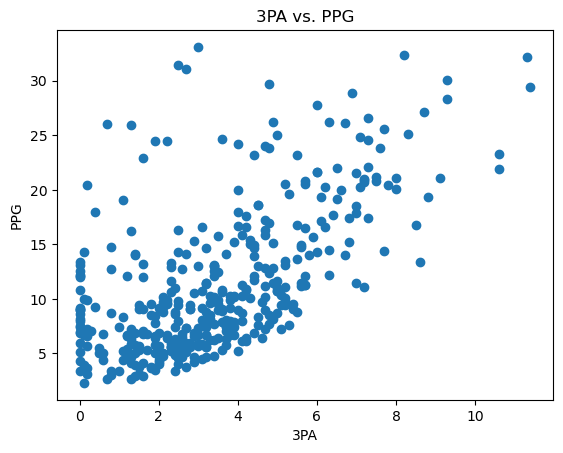

In [24]:
# seeing if 3 point attempts is generally correlated with points scored 

plt.scatter(nba_2023['3PA'], nba_2023['PPG'])
plt.xlabel('3PA')
plt.ylabel('PPG')
plt.title('3PA vs. PPG')

In [25]:
nba_2023[['3PA', 'PPG']].corr()

,3PA,PPG
3PA,1.000000,0.615261
PPG,0.615261,1.000000


As we can see above, our 3PA and PPG have a positive linear correlation, which (at least for the time being) tells us that there is certainly a relationship here. This is not particularly surprising, as shooting shots that have more value if converted would intuitively mean a player is going to score more points. This tells us that exploring the causal impact of 3PA on PPG has some merit, considering the association.

As for any opportunities for further exploration, it would likely be worth exploring whether or not shooting more 3s leads to more points, as opposed to shooting less 3s but opting for higher percentage 2 point shots. Essentially, this question would be testing whether or not the fact that 3 > 2 offsets the lower probability of making said shot in terms of total points scored.

### Methodology: Nonlinear Outcome Regression

#### Testing Confounders

There are 3 position groupings in basketball: guard (G), forward (F), and center (C). Additionally, some players are listed as being more than one position:

In [26]:
nba_2023['POS'].value_counts()

G      155
F      113
G-F     37
F-C     30
C       30
F-G     17
C-F     15
Name: POS, dtype: int64

We want to make sure this column is numerical, so we will have to binarize. In order to account for those who play multiple positions, we will make each of those combinations their own position group. This will ensure each player only has a single 1 for any of our dummy variables, and is also likely to be more reflective of the fact that someone who can play different positions likely deserves a different categorization.

In [27]:
dummy_pos = pd.get_dummies(nba_2023['POS'])
nba_2023.drop(columns = ['POS'], inplace = True)
nba_2023 = pd.concat([nba_2023, dummy_pos], axis = 1)

Let's observe the correlations between our potential confounders (and colliders), and our treatment and outcome: 

/tmp/ipykernel_243/2690115321.py:2: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig, sbp = plt.subplots(ncols=2, figsize=(12, 6))


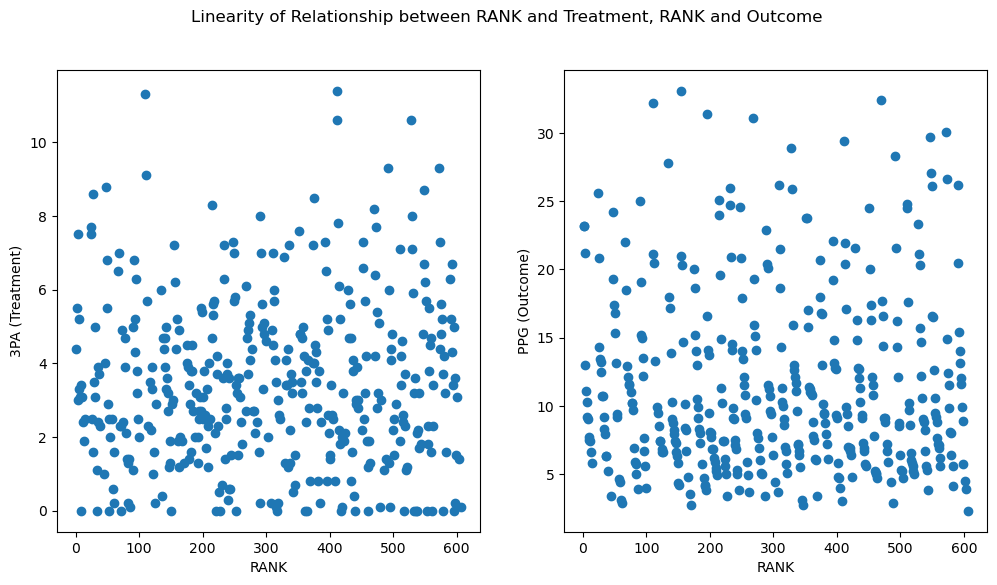

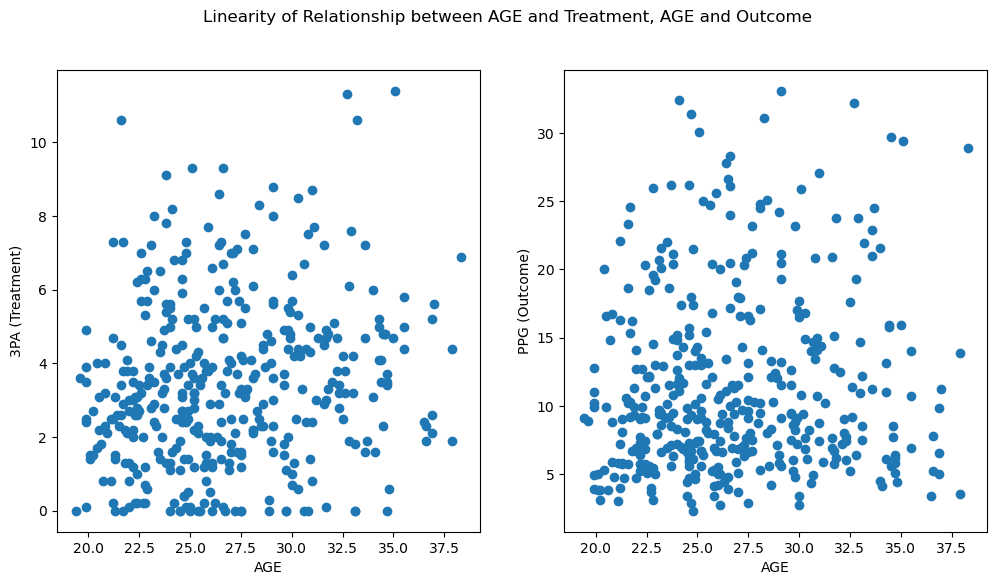

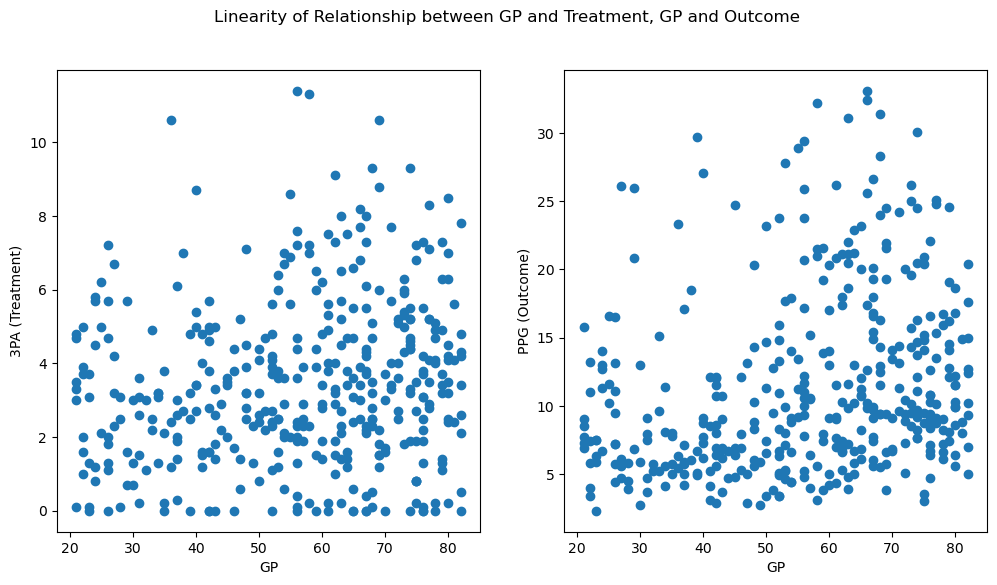

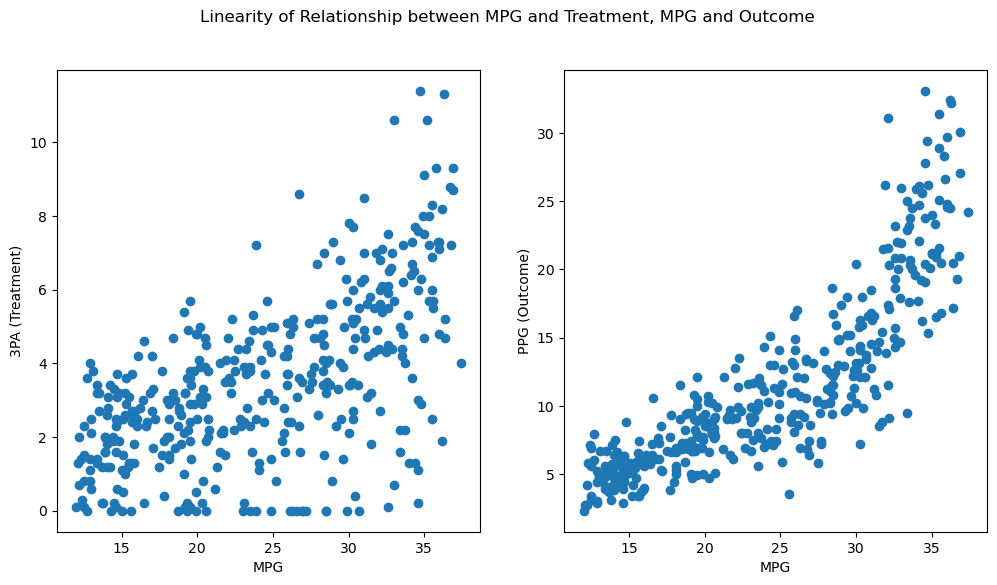

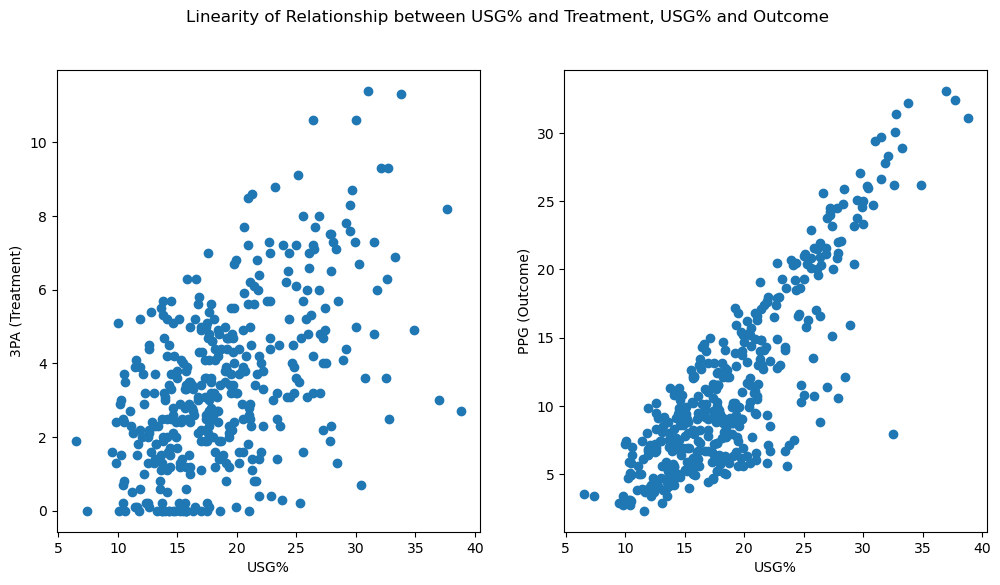

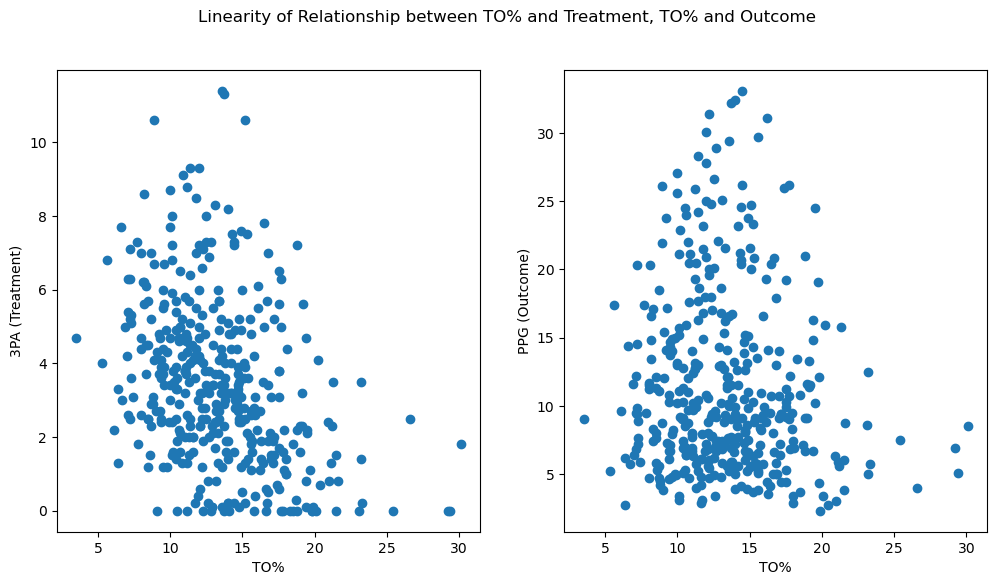

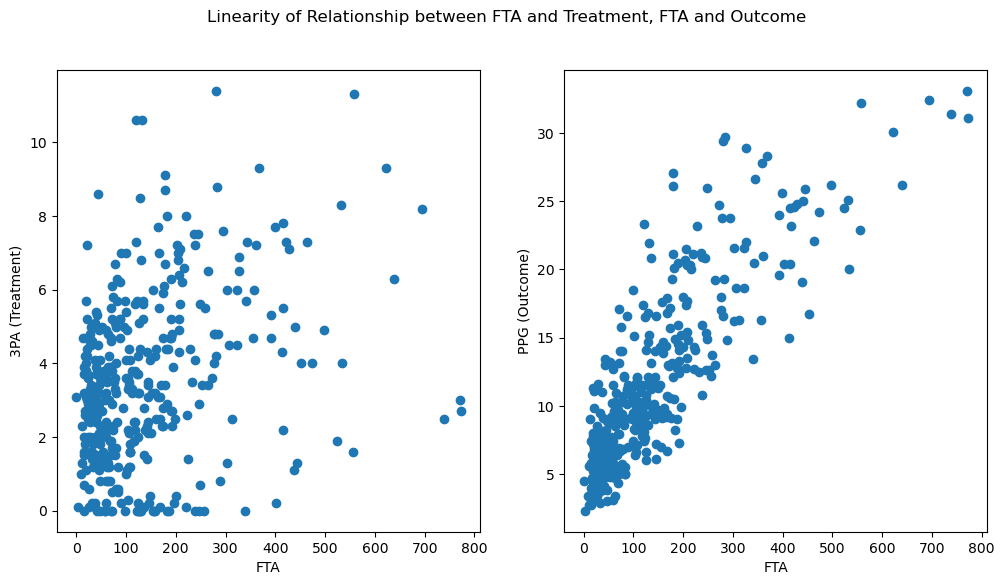

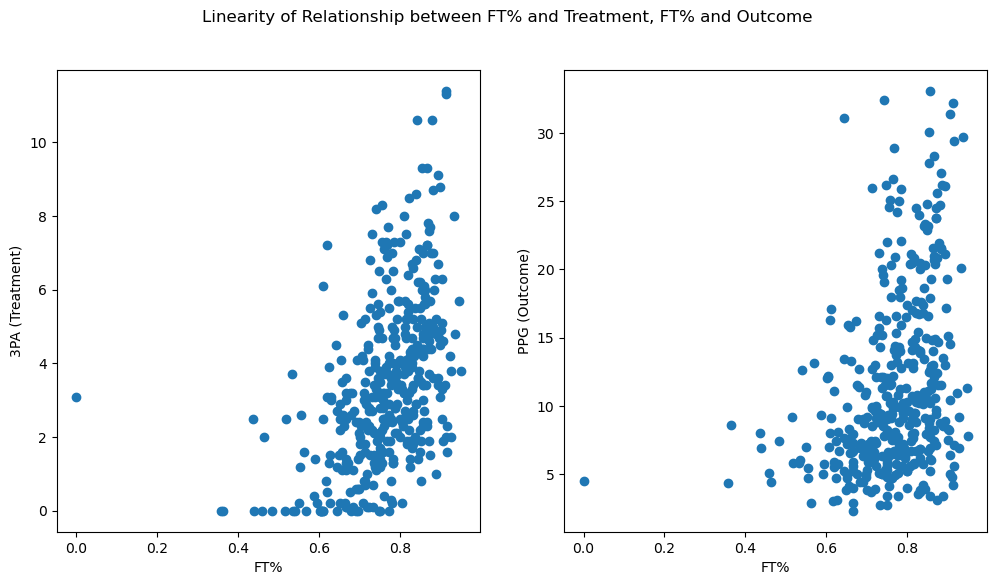

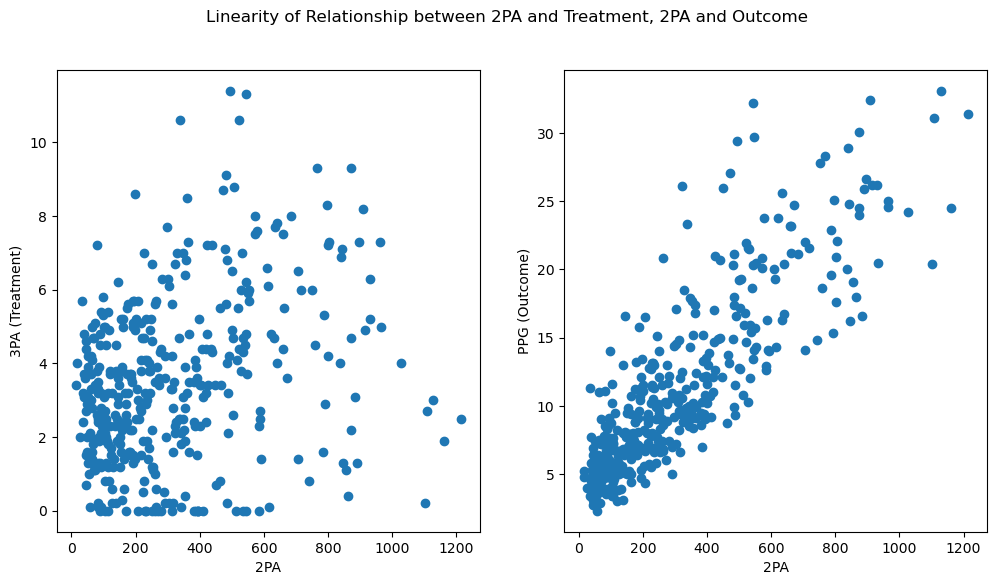

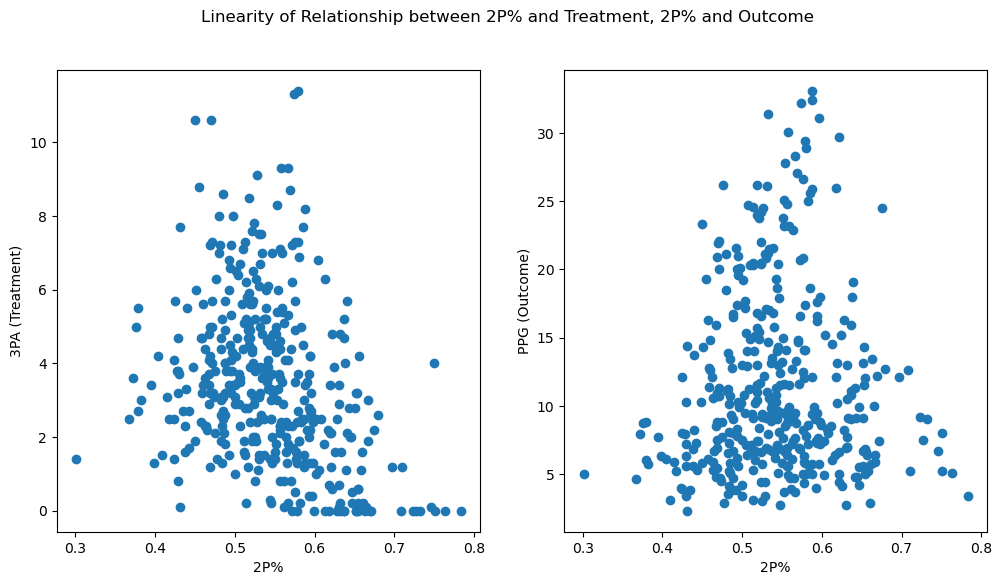

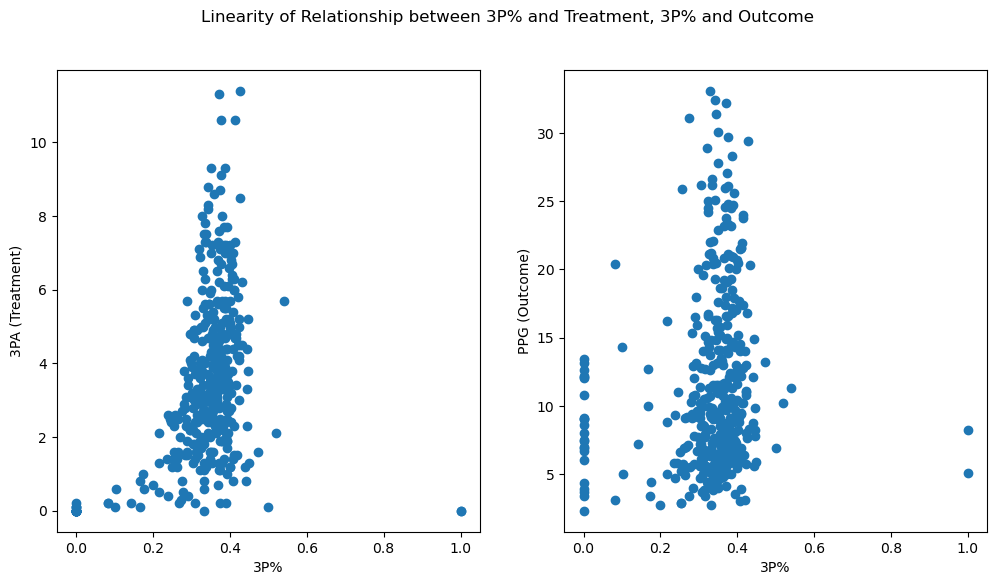

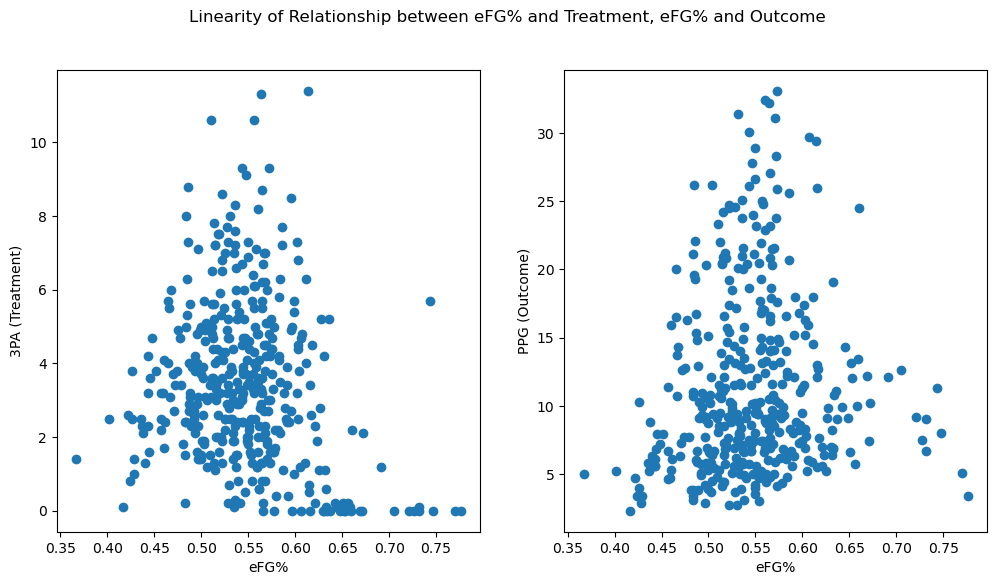

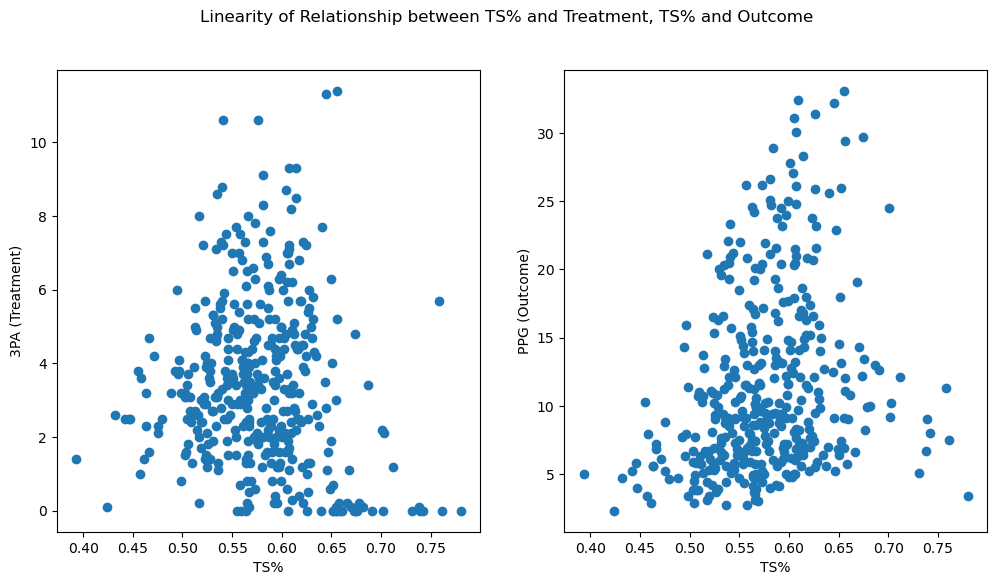

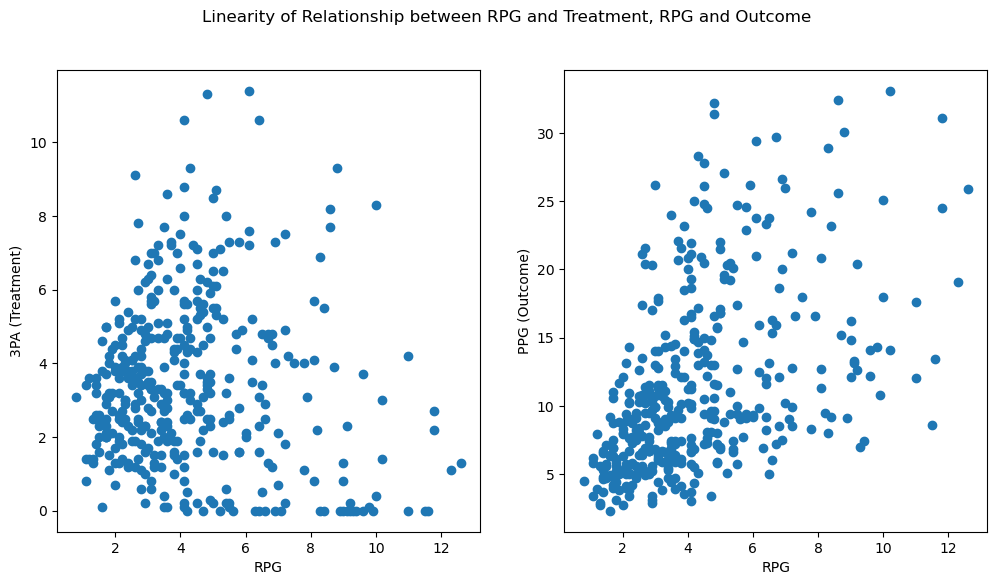

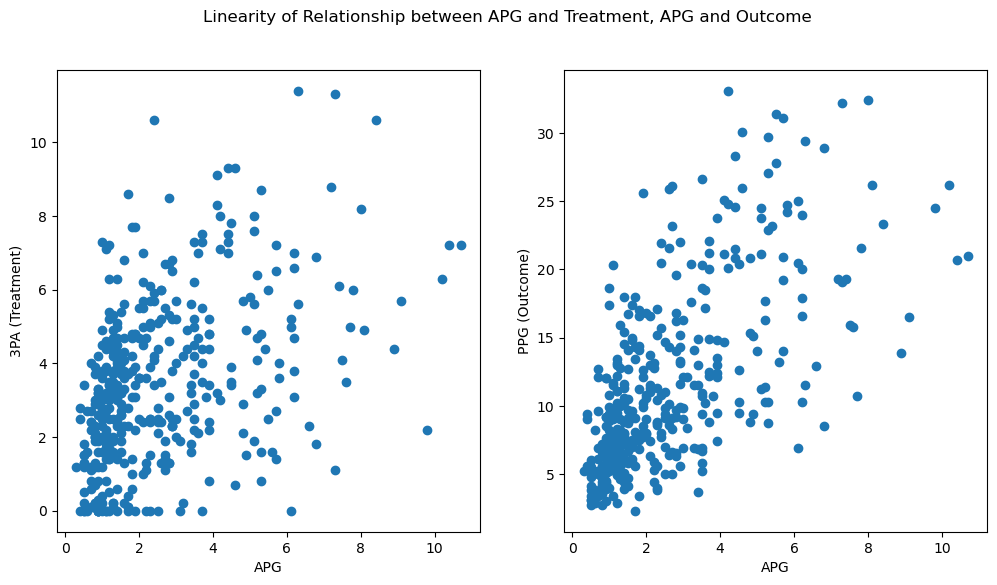

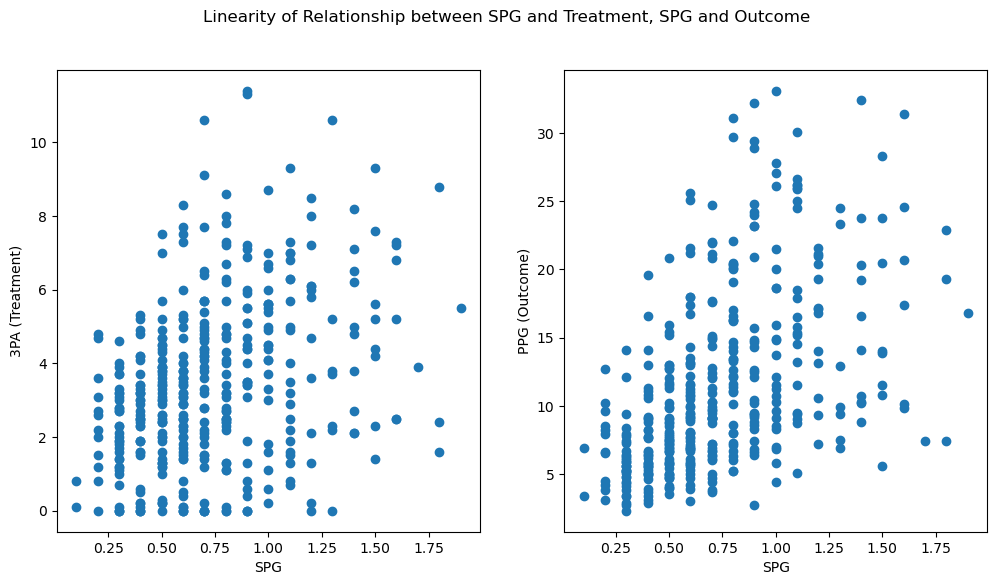

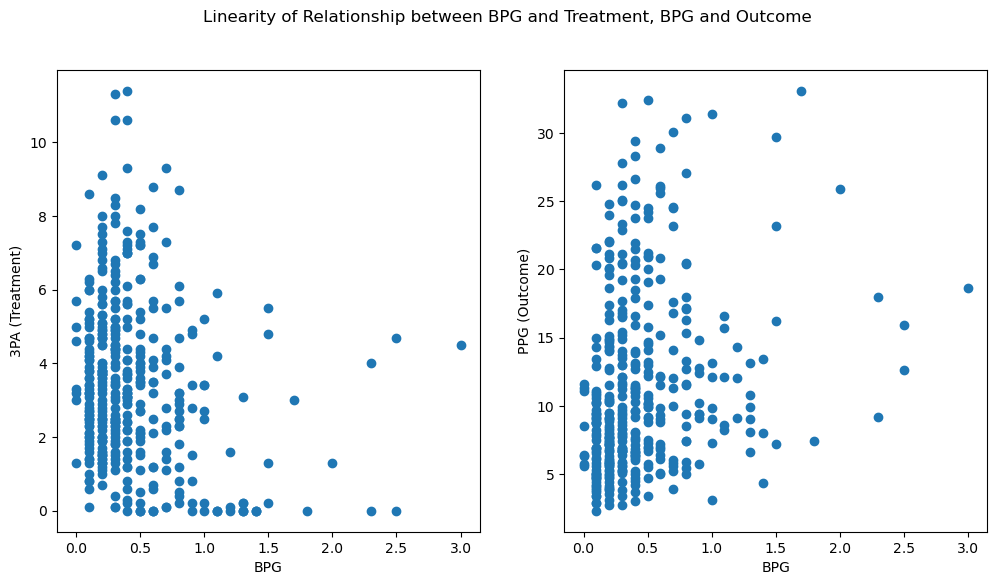

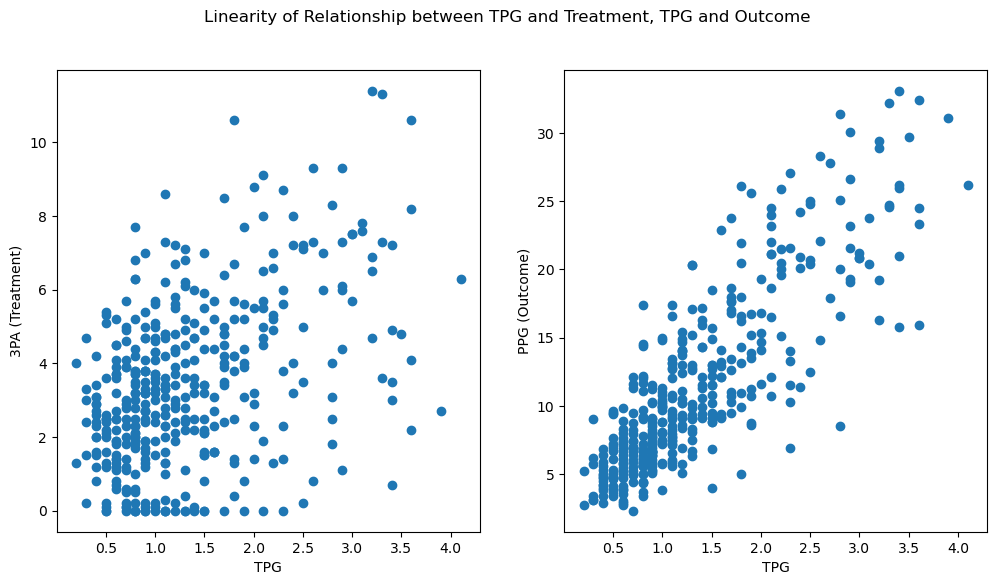

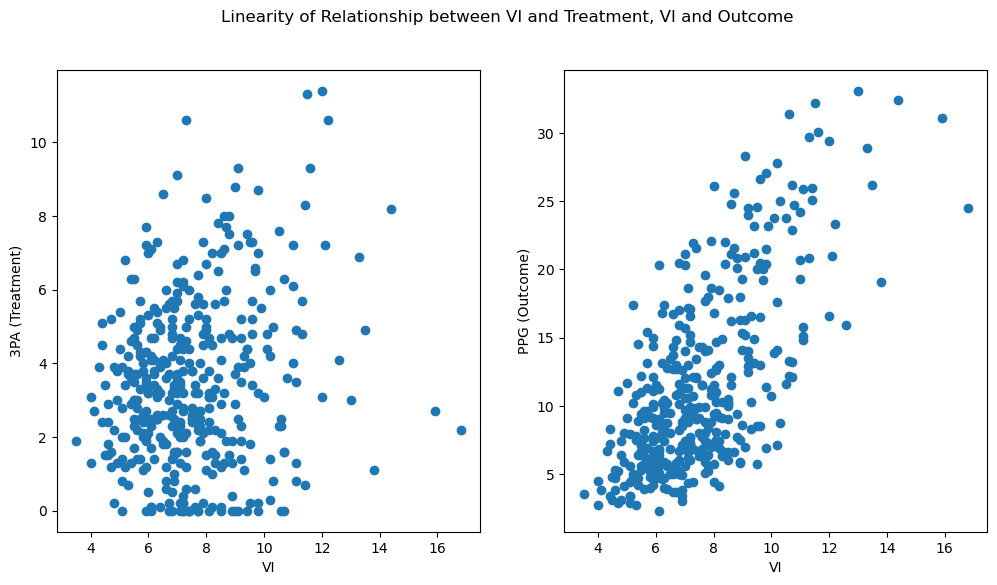

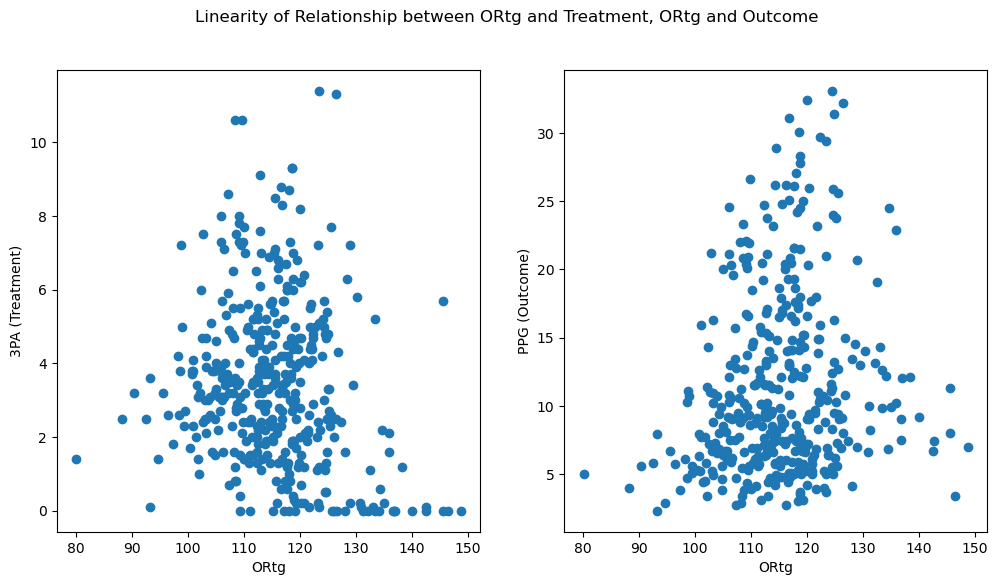

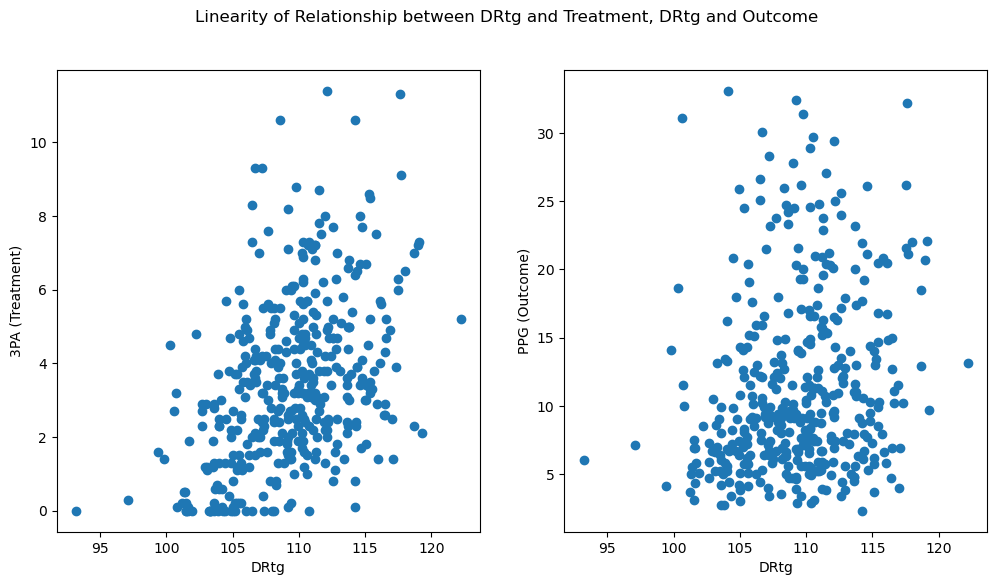

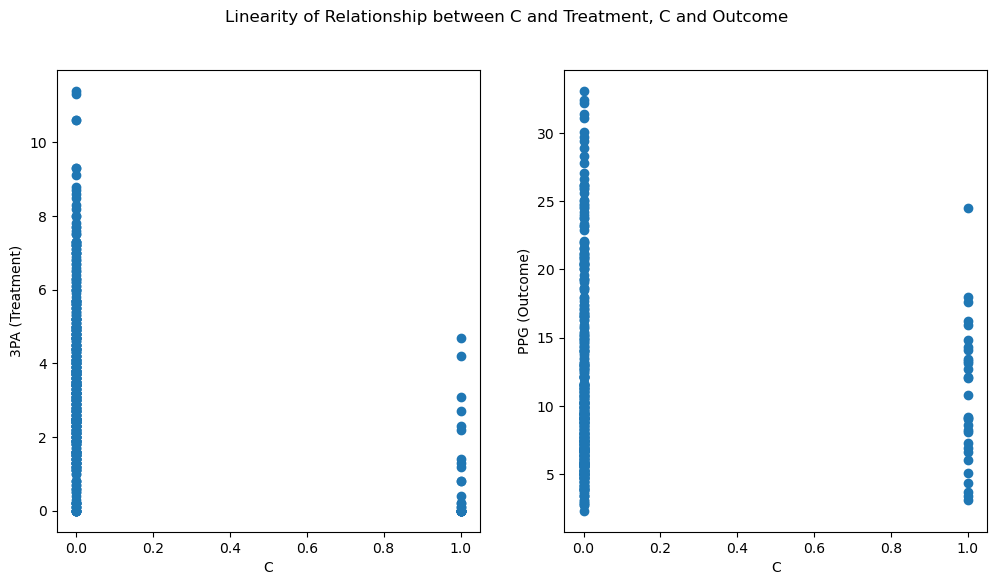

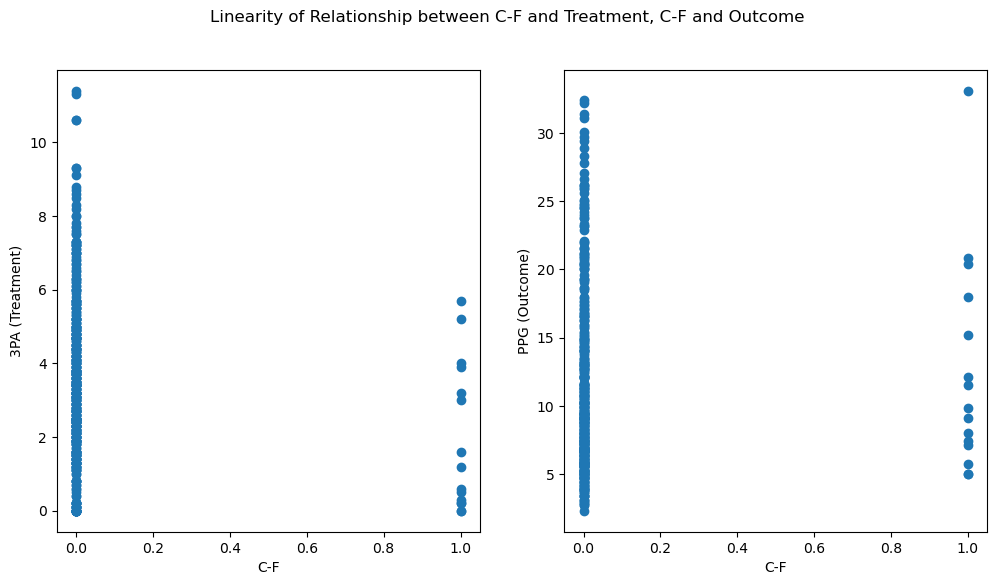

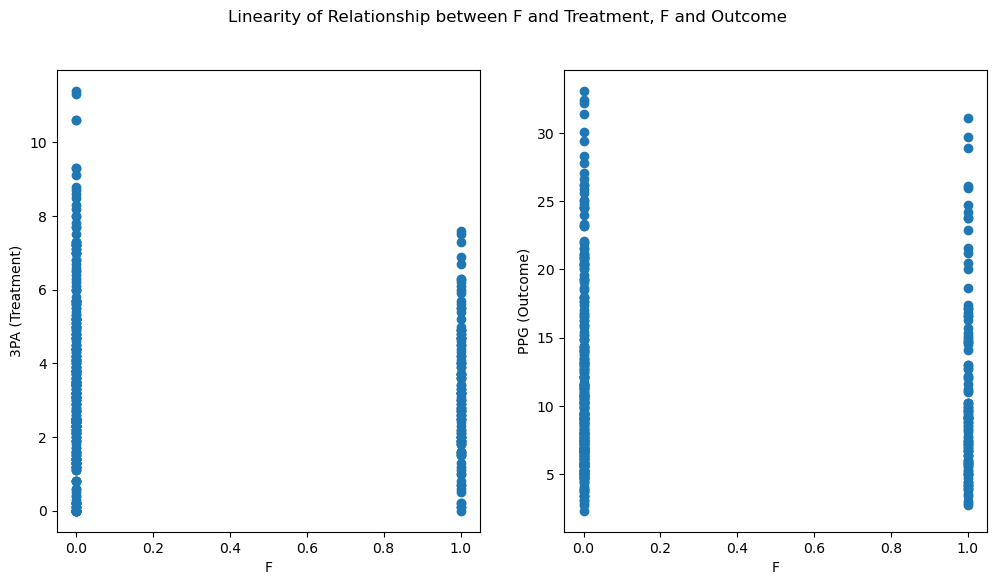

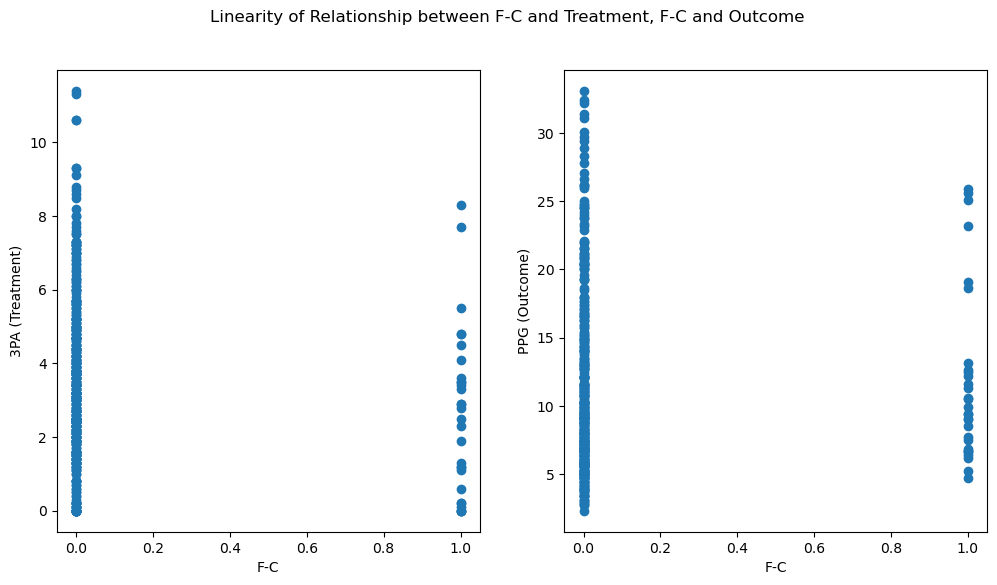

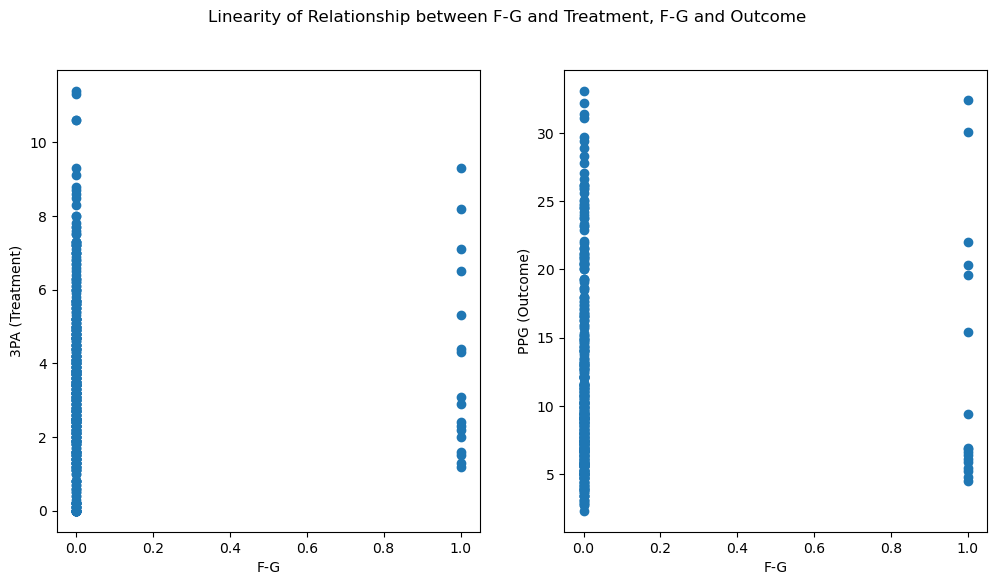

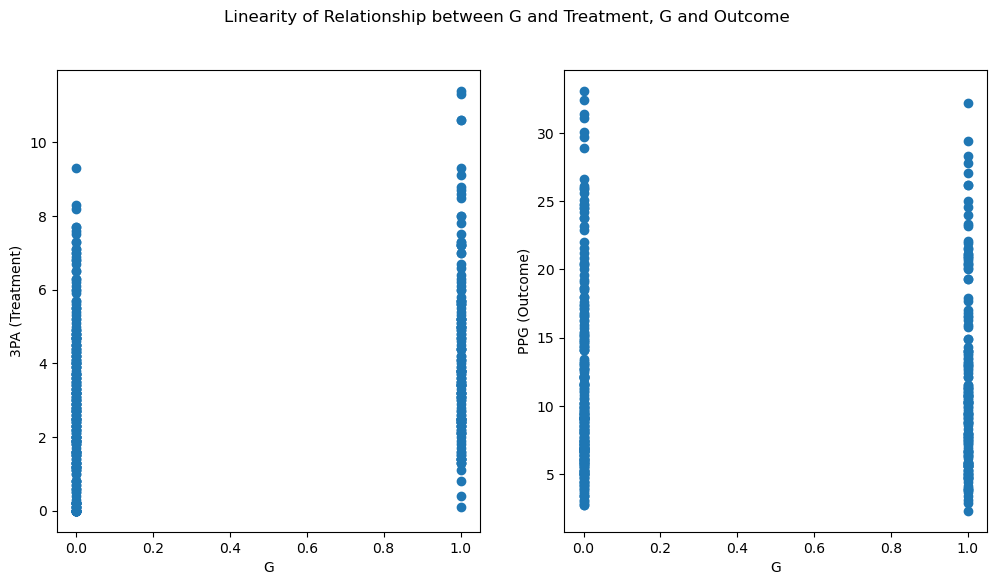

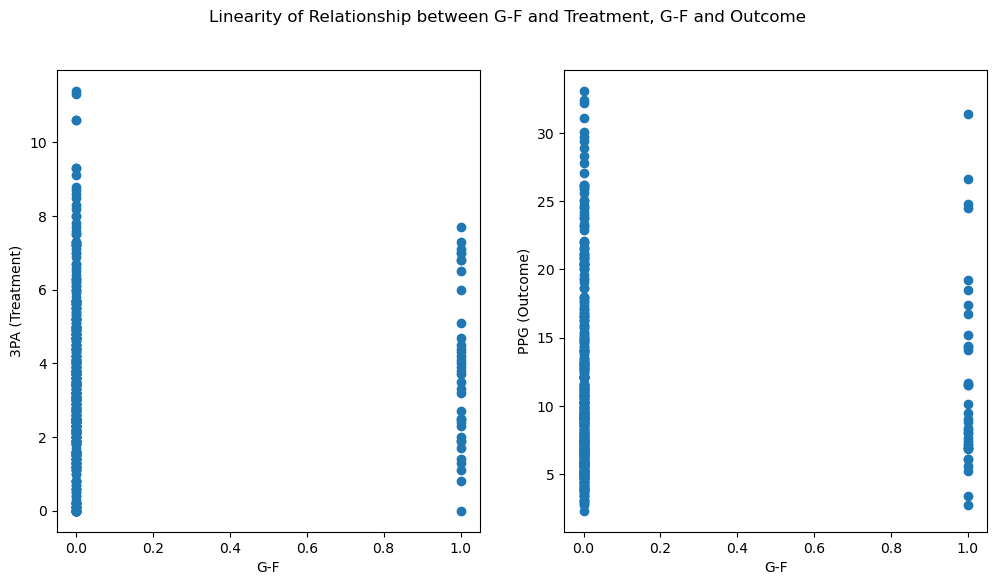

In [28]:
def plot_treatment_outcome_confounder(confounder):
    fig, sbp = plt.subplots(ncols=2, figsize=(12, 6))
    ax0 = sbp[0] 
    ax1 = sbp[1]
    fig.suptitle(f'Linearity of Relationship between {confounder} and Treatment, {confounder} and Outcome')
    
    # plotting the treatment and confounder correlation 
    ax0.set_xlabel(confounder)
    ax0.set_ylabel('3PA (Treatment)')
    s = ax0.scatter(nba_2023[confounder], nba_2023['3PA'])
    
    # plotting the outcome and confounder correlation
    ax1.set_xlabel(confounder)
    ax1.set_ylabel('PPG (Outcome)')
    s = ax1.scatter(nba_2023[confounder], nba_2023['PPG'])
    

confounders = [item for item in nba_2023.columns if item not in ['3PA', 'PPG']]

for confounder in confounders:
    plot_treatment_outcome_confounder(confounder)

As a reminder, for something to be a confounder, there must be a causal relationship with both the treatment and outcome, and for something to be a collider, there must be a causal arrow pointing from both treatment and outcome to the variable. 

We use both our causal DAG, which we built using our general basketball knowledge since there isn't much peer-reviewed research to aid our decisions, and the above visualizations to decide on our confounders and colliders. 

For the potential confounders, we see that the following variables have no association with either treatment or outcome: 

RANK, AGE, GP, 2P%, 3P%, eFG%, TS%, RPG, BPG, ORtg, F, F-G, G, G-F.

The following have relationships with one of treatment/outcome, but none/fairly weak with the other (variable in paranthesis indicates the stronger relationship): 

FTA (PPG), 2PA (PPG), C-F (3PA), TPG (PPG), VI (PPG), DRtg (3PA).

The following have solid relationships with both: 

MPG, TO%, APG, SPG, USG%, C, FT%. 

So, we will remove the ones with no relationship from our model. We will keep those with weaker relationships with one or the other, since even a small relationship is worthwhile to model for, and naturally we keep the ones with a relationship with both.


As for potential colliders, based on our causal DAG (shown below), which we built off of the graphed relationships and off of intuition, we have (justifications in parentheses): 

RANK (more points and more shots influences player rank), 3P% (more points and more 3s influences percentage), ORtg (3PA and PPG are factors in ORtg, and ORtg does not cause someone to shoot more 3s or score more), TS% (same reason as ORtg), and eFG% (same reason as ORtg).

Fortunately, we got rid of our suspected colliders in the confounder finder stage, so we don't need to amend our list of confounders.


That leaves our current list of confounders as the following:

FTA, 2PA, C-F, TPG, VI, DRtg, MPG, TO%, APG, SPG, USG%, C, FT%. 

In [29]:
final_confounders = ['FTA', '2PA', 'C-F', 'TPG', 'VI', 'DRtg', 'MPG', 'TO%', 'APG', 'SPG', 'DRtg', 'USG%', 'C', 'FT%']

#### Building the Model

First, let's determine our treatment threshold, which is defined as the average 3PA. We create a corresponding column to map this.

In [30]:
mean_3 = np.mean(nba_2023['3PA'])
print(f'T = 1: > {np.round(mean_3, 2)} 3PA')
print(f'T = 0: <= {np.round(mean_3, 2)} 3PA')

T = 1: > 3.45 3PA
T = 0: <= 3.45 3PA


Now that we have our thresholds, we must binarize our data. We create a new dataframe with our desired columns below:

In [31]:
nba_2023['T = 1'] = nba_2023['3PA'].apply(lambda x: 1 if(x > mean_3) else 0) # if treatment is applied (> league average 3PA)

For fitting our variables, we want to examine whether or not we should use nonlinearized relationships based on the scatterplots. 

Let's show the confounder scatterplots again, but just looking at the relationship between the confounder and the outcome, since that is what will determine the relationship shown in the model.

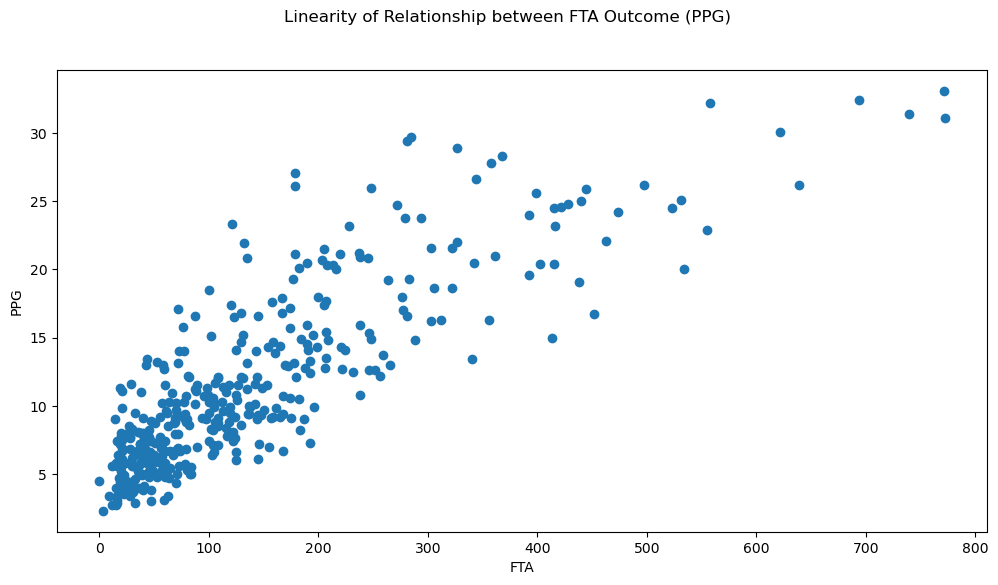

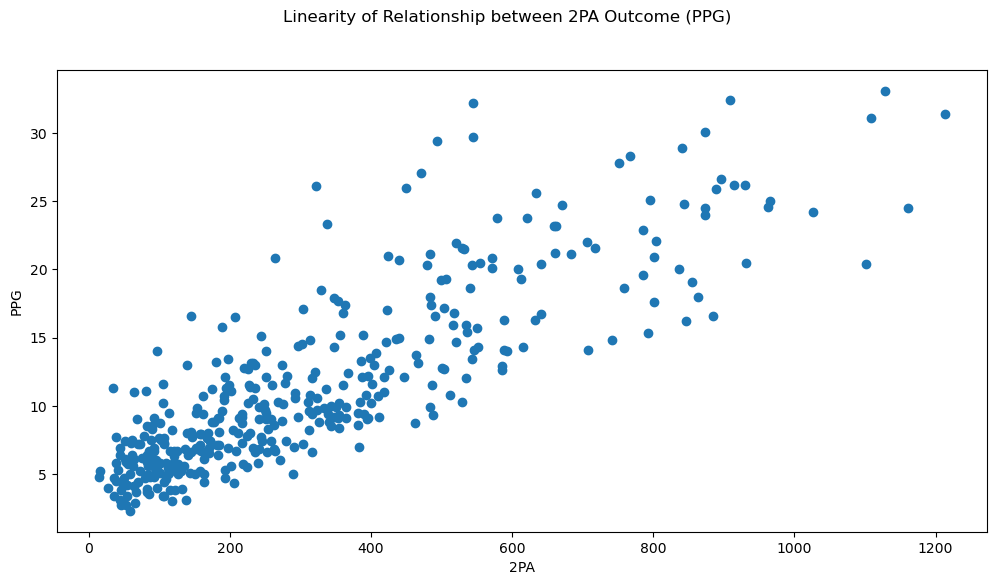

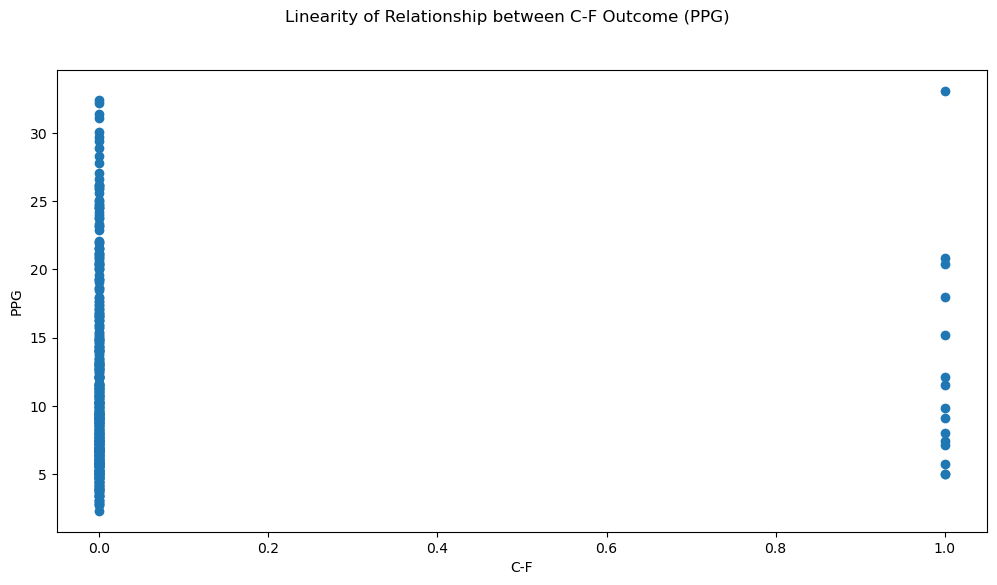

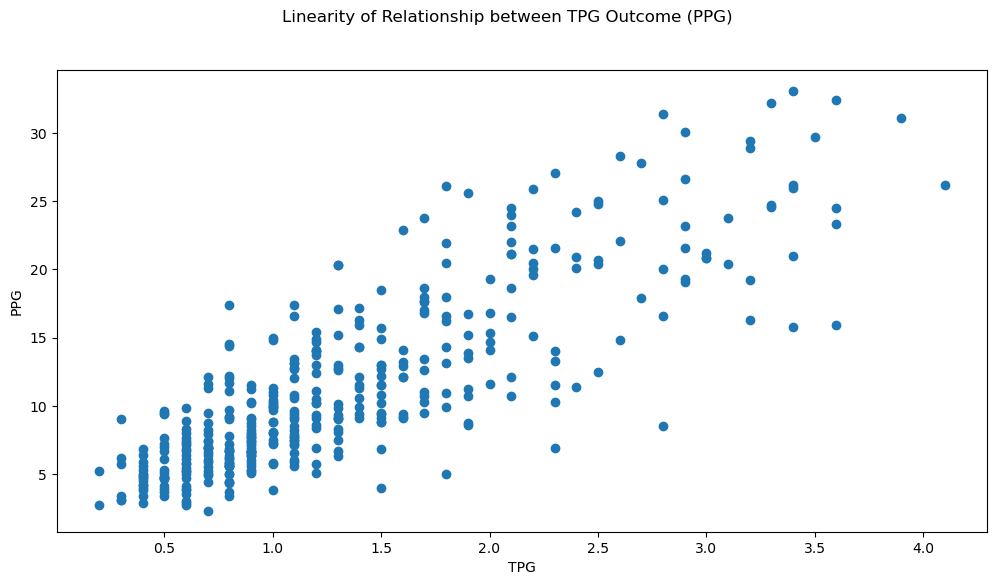

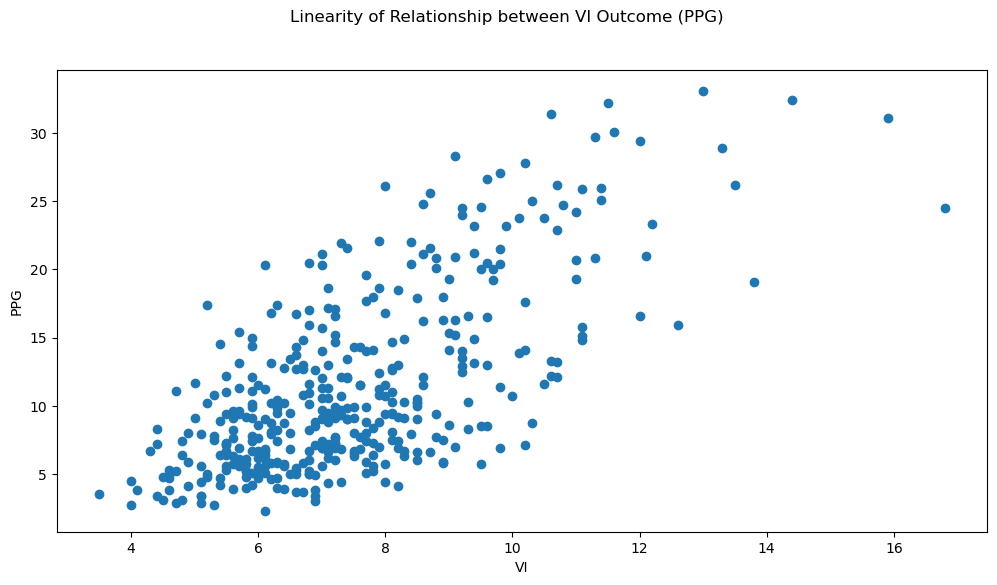

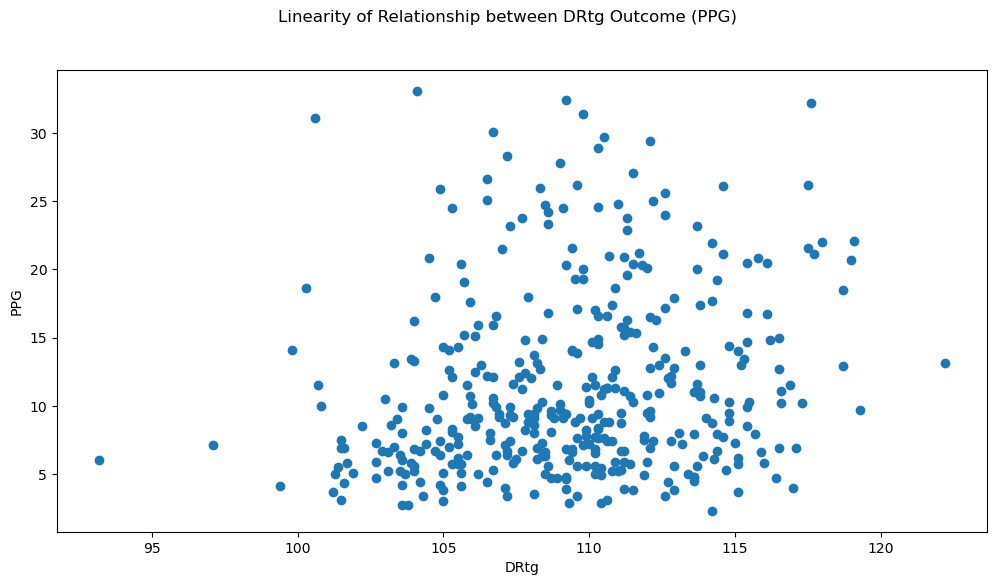

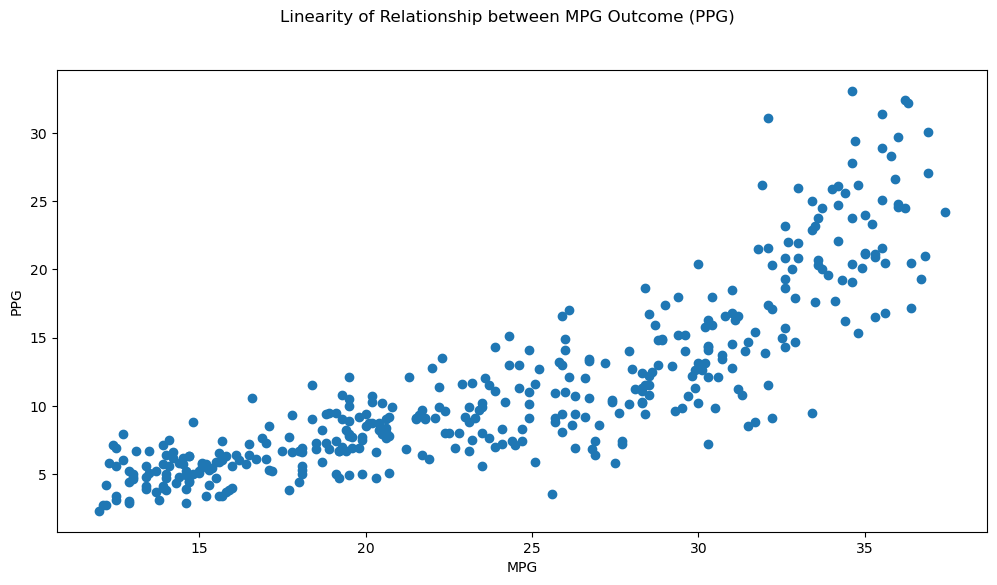

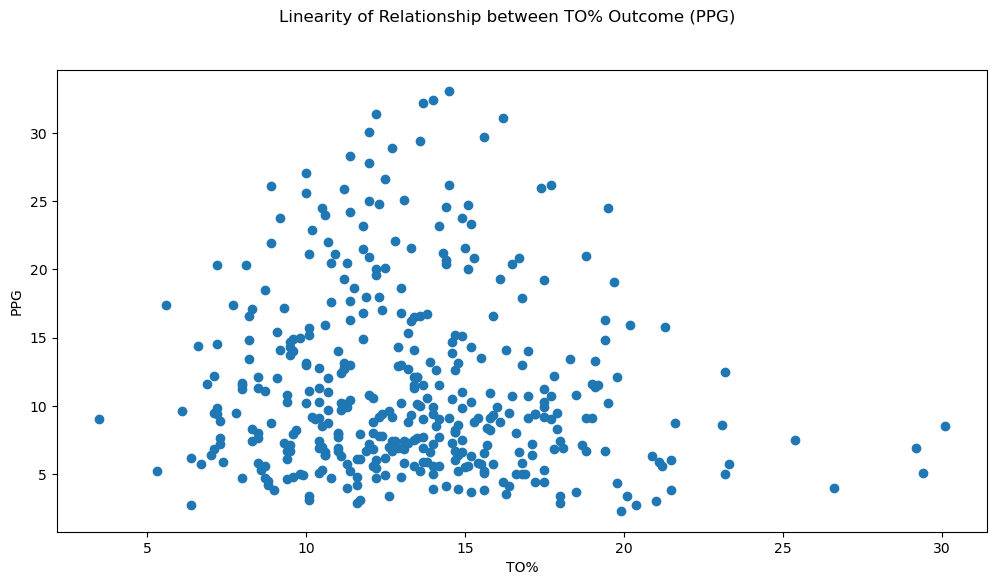

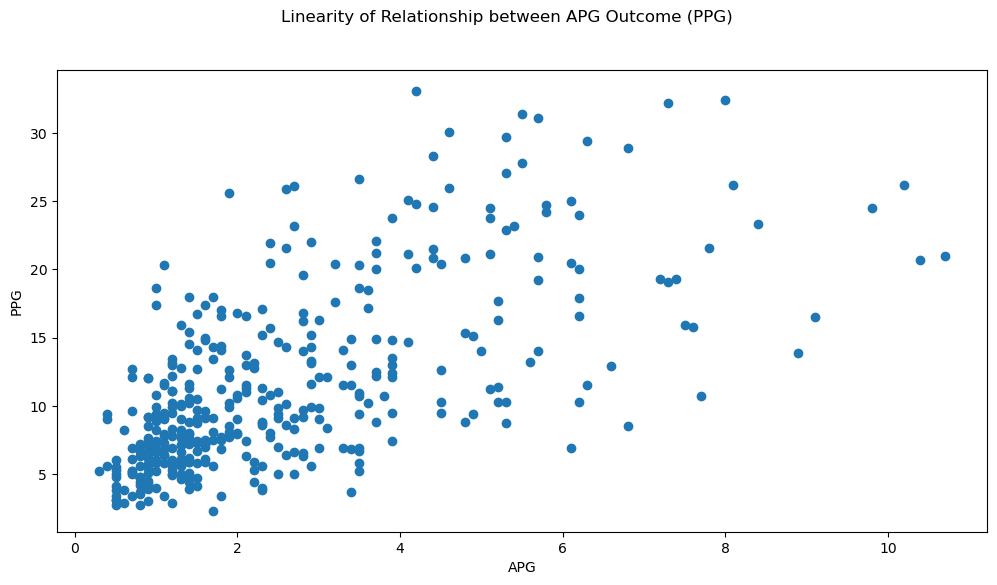

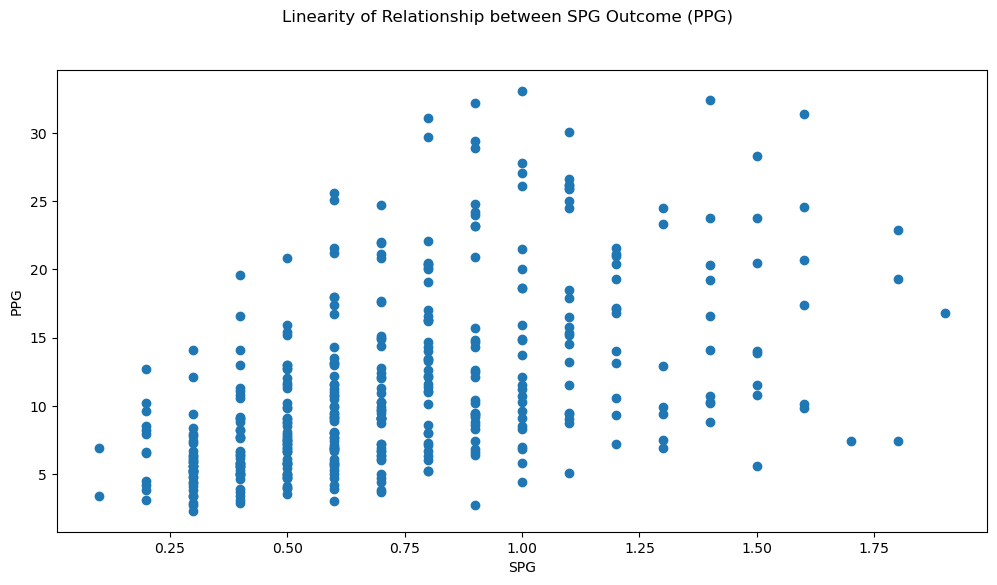

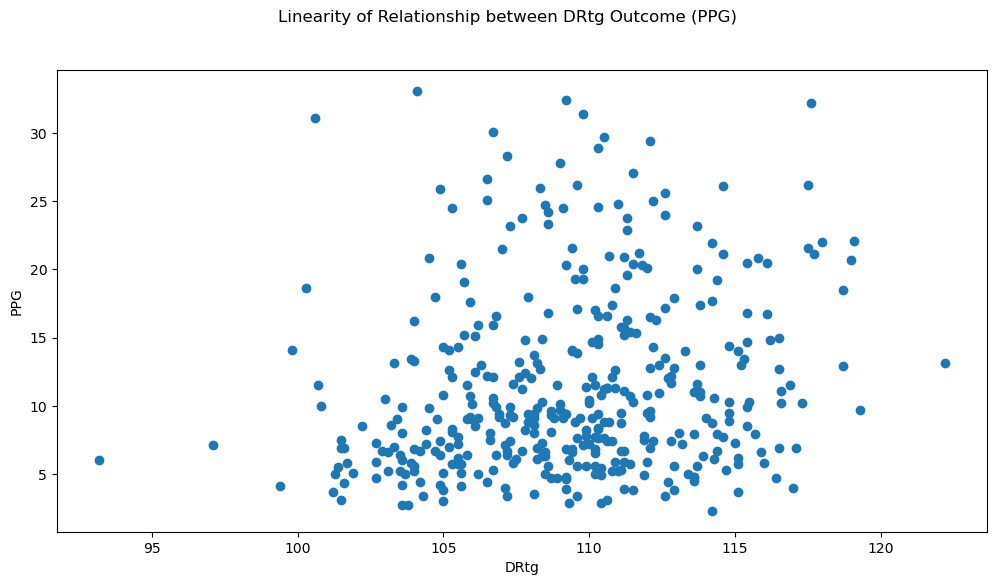

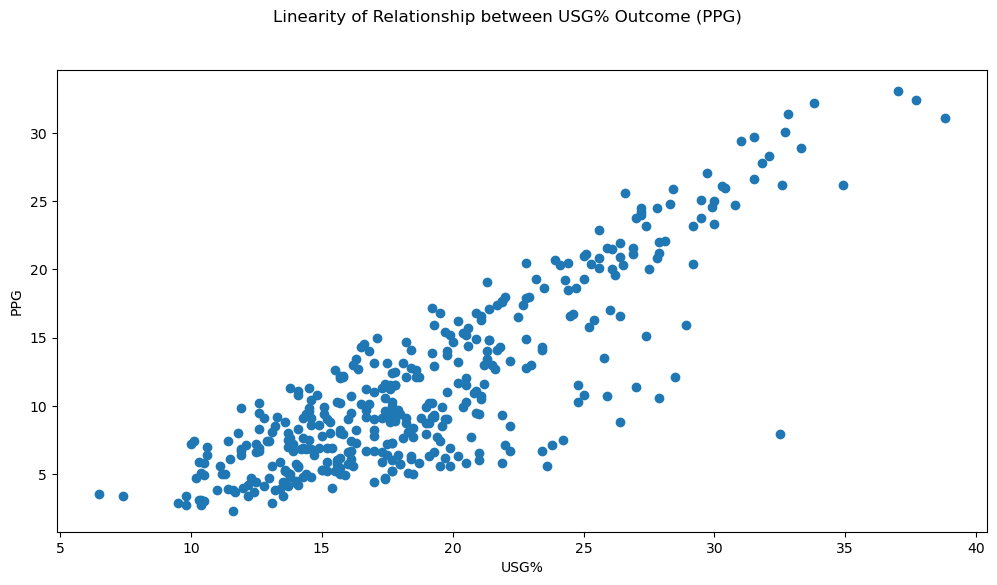

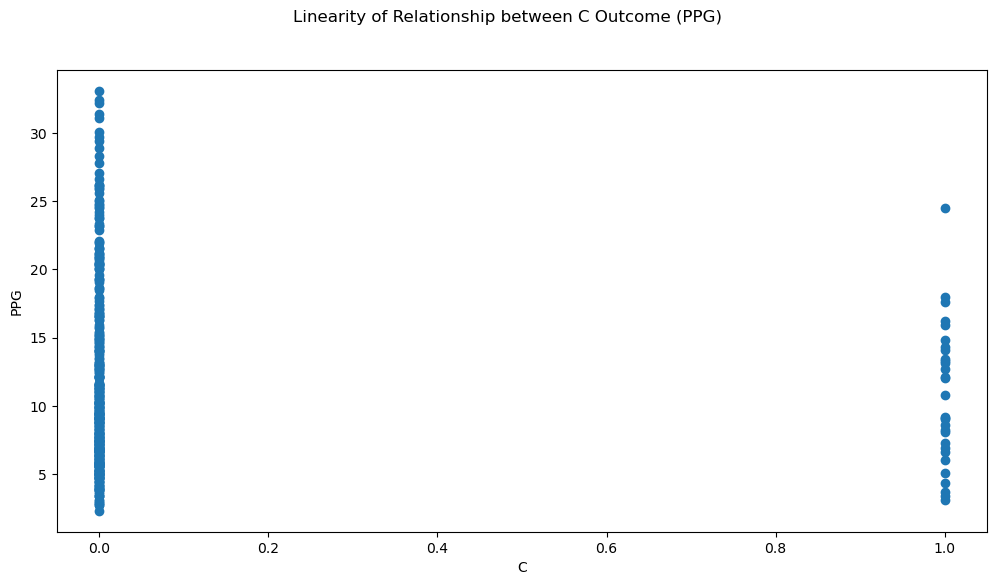

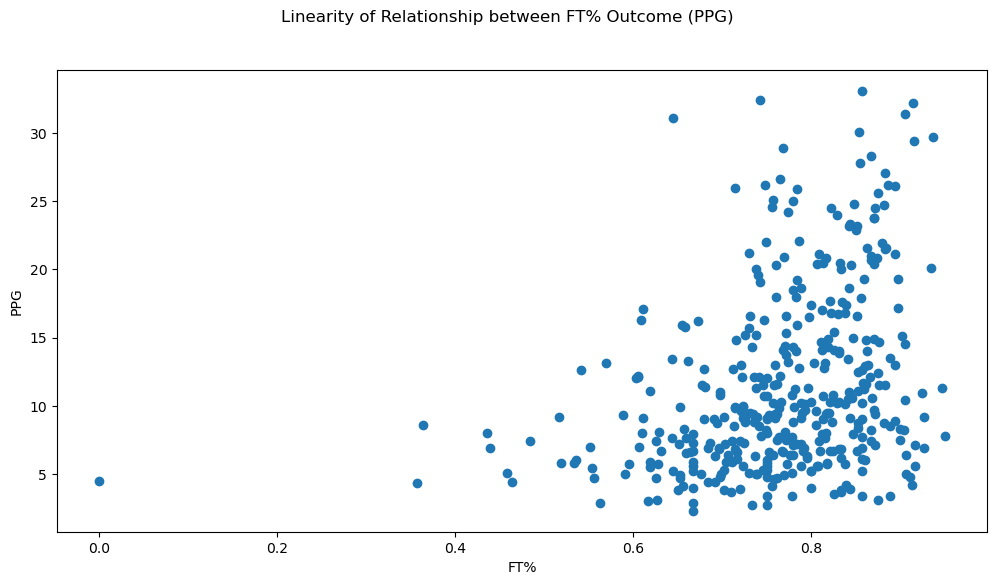

In [32]:
for confounder in final_confounders:
    fig, sbp = plt.subplots(ncols=1, figsize=(12, 6))
    fig.suptitle(f'Linearity of Relationship between {confounder} Outcome (PPG)')
    s = sbp.scatter(nba_2023[confounder], nba_2023['PPG'])
    sbp.set_xlabel(confounder)
    sbp.set_ylabel('PPG')


It looks like linear relationships are reasonable for our model. They certainly aren't perfect, but it doesn't look like there is another option we should use. 

Therefore, we will use our outcome regression under two assumptions: the unconfoundedness assumption mentioned earlier, and the linearity of the relationships. 

In [33]:
# creating the regression model

fitted_model = sm.OLS(nba_2023['PPG'], nba_2023[final_confounders + ['T = 1']]).fit()
fitted_model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                                 OLS Regression Results                                
=======================================================================================
Dep. Variable:                    PPG   R-squared (uncentered):                   0.991
Model:                            OLS   Adj. R-squared (uncentered):              0.991
Method:                 Least Squares   F-statistic:                              2966.
Date:                Wed, 10 May 2023   Prob (F-statistic):                        0.00
Time:                        23:38:47   Log-Likelihood:                         -656.13
No. Observations:                 397   AIC:                                      1340.
Df Residuals:                     383   BIC:                                      1396.
Df Model:                          14                                                  
Covariance Type:            nonrobust                                                  
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
FTA            0.0105      0.001      9.525      0.000       0.008       0.013
2PA           -0.0017      0.001     -2.456      0.015      -0.003      -0.000
C-F            0.2834      0.362      0.783      0.434      -0.428       0.995
TPG            1.6496      0.352      4.681      0.000       0.957       2.343
VI             0.1696      0.070      2.414      0.016       0.031       0.308
DRtg          -0.0314      0.004     -7.284      0.000      -0.040      -0.023
MPG            0.3865      0.025     15.600      0.000       0.338       0.435
TO%           -0.2696      0.031     -8.615      0.000      -0.331      -0.208
APG           -0.1512      0.076     -1.998      0.046      -0.300      -0.002
SPG           -0.2344      0.270     -0.869      0.386      -0.765       0.296
DRtg          -0.0314      0.004     -7.284      0.000      -0.040      -0.023
USG%           0.4042      0.033     12.307      0.000       0.340       0.469
C              0.2858      0.286      0.999      0.318      -0.277       0.848
FT%            1.5005      0.700      2.144      0.033       0.124       2.877
T = 1         -0.2330      0.193     -1.207      0.228      -0.613       0.147
==============================================================================
Omnibus:                       29.826   Durbin-Watson:                   1.551
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               43.534
Skew:                           0.542   Prob(JB):                     3.52e-10
Kurtosis:                       4.207   Cond. No.                     4.61e+17
==============================================================================

Notes:
[1] R² is computed without centering (uncentered) since the model does not contain a constant.
[2] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[3] The smallest eigenvalue is 3.96e-28. This might indicate that there are
strong multicollinearity problems or that the design matrix is singular.
"""

In [34]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import pymc3 as pm
import theano.tensor as tt
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor

In [35]:
file_path_player = "NBA Stats 202223 All Stats  NBA Player Props Tool.csv"
nba_data = pd.read_csv(file_path_player)
file_path_team = "2023_team_metrics"
team_data = pd.read_csv(file_path_team)

In [36]:
nba_data.head(1)

,RANK,NAME,TEAM,POS,AGE,GP,MPG,USG%,TO%,FTA,...,APG,SPG,BPG,TPG,P+R,P+A,P+R+A,VI,ORtg,DRtg
0,1,Joel Embiid,Phi,C-F,29.1,66,34.6,37.0,14.5,771,...,4.2,1.0,1.7,3.4,43.2,37.2,47.4,13.0,124.4,104.1


In [37]:
nba_data.columns

Index(['RANK', 'NAME', 'TEAM', 'POS', 'AGE', 'GP', 'MPG', 'USG%', 'TO%', 'FTA',
       'FT%', '2PA', '2P%', '3PA', '3P%', 'eFG%', 'TS%', 'PPG', 'RPG', 'APG',
       'SPG', 'BPG', 'TPG', 'P+R', 'P+A', 'P+R+A', 'VI', 'ORtg', 'DRtg'],
      dtype='object')

In [38]:
team_data.head(2)

,RANK,TEAM,CONF,DIVISION,GP,PPG,oPPG,pDIFF,PACE,oEFF,...,SAR,CONS,A4F,W,L,WIN%,eWIN%,pWIN%,ACH,STRK
0,1,Milwaukee,East,Central,82,116.9,113.3,3.6,100.5,115.5,...,3.16,15.0,0.086,58,24,0.707,0.595,0.619,0.112,-2
1,2,Boston,East,Atlantic,82,117.9,111.4,6.5,98.4,118.1,...,5.76,14.3,0.063,57,25,0.695,0.677,0.714,0.018,3


In [39]:
team_data.columns

Index(['RANK', 'TEAM', 'CONF', 'DIVISION', 'GP', 'PPG', 'oPPG', 'pDIFF',
       'PACE', 'oEFF', 'dEFF', 'eDIFF', 'SOS', 'rSOS', 'SAR', 'CONS', 'A4F',
       'W', 'L', 'WIN%', 'eWIN%', 'pWIN%', 'ACH', 'STRK'],
      dtype='object')

# Prediction with GLMs and nonparametric methods

In this research, we aim to predict the success of NBA teams based on various team and player statistics. The goal is to understand which statistics are most influential in determining a team's success and to compare the performance of generalized linear models (GLMs) and nonparametric models in making these predictions. 

To predict team success, we will primarily use the 'WIN%' feature from the team_data dataset as our target variable, which represents the winning percentage of each team. This is a suitable measure of success as it reflects the proportion of games won out of the total games played.

For the features, we will consider a combination of team-level and player-level statistics to capture the overall performance of the teams. The following features are chosen based on their potential relevance to the team's success:

1. PPG (Points Per Game) - A higher average points scored per game is generally indicative of a strong offensive team.
2. oPPG (Opponent Points Per Game) - A lower average points scored by the opponents per game reflects a strong defensive team.
3. PACE (Number of possessions per 48 minutes) - The speed at which a team plays can impact their offensive and defensive strategies.
4. oEFF (Offensive Efficiency) - A measure of a team's scoring efficiency, which can indicate the quality of their offense.
5. dEFF (Defensive Efficiency) - A measure of a team's ability to prevent opponents from scoring, indicating the quality of their defense.
6. eDIFF (Efficiency Differential) - The difference between a team's offensive and defensive efficiency, which can provide an overall assessment of the team's performance.
7. USG% (Usage Percentage) - Measures the percentage of team plays involving a specific player while they are on the court. This can help identify key players contributing to the team's success.

These features were selected because they capture different aspects of a team's performance, such as offense, defense, pace of play, and individual player contributions. By incorporating these features into our models, we can analyze the relationship between various statistics and the overall success of NBA teams.

In [40]:
# map abbreviations to full names
team_map = {'Phi': 'Philadelphia', 'Dal': 'Dallas', 'Por': 'Portland', 'Okc': 'Oklahoma City',
            'Mil': 'Milwaukee', 'Bos': 'Boston', 'Bro': 'Brooklyn', 'Gol': 'Golden State',
            'Lal': 'LA Lakers', 'Cle': 'Cleveland', 'Pho': 'Phoenix', 'Mem': 'Memphis',
            'Atl': 'Atlanta', 'Nor': 'New Orleans', 'Uta': 'Utah', 'Nyk': 'New York',
            'Sac': 'Sacramento', 'Chi': 'Chicago', 'Min': 'Minnesota', 'Den': 'Denver',
            'Tor': 'Toronto', 'Lac': 'LA Clippers', 'Cha': 'Charlotte', 'Was': 'Washington',
            'Mia': 'Miami', 'Hou': 'Houston', 'San': 'San Antonio', 'Det': 'Detroit', 'Ind': 'Indiana',
            'Orl': 'Orlando'}

# abbreviations to full names 
nba_data['TEAM'] = nba_data['TEAM'].map(team_map)

In [41]:
merged_data = nba_data.merge(team_data, on="TEAM")

In [42]:
merged_data.head(1)

,RANK_x,NAME,TEAM,POS,AGE,GP_x,MPG,USG%,TO%,FTA,...,SAR,CONS,A4F,W,L,WIN%,eWIN%,pWIN%,ACH,STRK
0,1,Joel Embiid,Philadelphia,C-F,29.1,66,34.6,37.0,14.5,771,...,4.51,13.3,0.021,54,28,0.659,0.629,0.642,0.03,2


In [43]:
merged_data.columns

Index(['RANK_x', 'NAME', 'TEAM', 'POS', 'AGE', 'GP_x', 'MPG', 'USG%', 'TO%',
       'FTA', 'FT%', '2PA', '2P%', '3PA', '3P%', 'eFG%', 'TS%', 'PPG_x', 'RPG',
       'APG', 'SPG', 'BPG', 'TPG', 'P+R', 'P+A', 'P+R+A', 'VI', 'ORtg', 'DRtg',
       'RANK_y', 'CONF', 'DIVISION', 'GP_y', 'PPG_y', 'oPPG', 'pDIFF', 'PACE',
       'oEFF', 'dEFF', 'eDIFF', 'SOS', 'rSOS', 'SAR', 'CONS', 'A4F', 'W', 'L',
       'WIN%', 'eWIN%', 'pWIN%', 'ACH', 'STRK'],
      dtype='object')

# Bayesian Modeling

**Methods**

For this research question, we will use a Bayesian linear regression model as our Bayesian GLM. We chose this model because it is a flexible and interpretable method for predicting the success of NBA teams based on the selected features. Linear regression models assume a linear relationship between the predictors and the target variable, which can help us understand the individual contributions of each feature to the winning percentage of the teams.
We used a Gaussian likelihood. The link function in this case is the identity function. This choice is made based on the assumption that the relationship between the predictor variables and the target variable is linear, and that the distribution of the target variable is approximately Gaussian given the predictor variables.

The Bayesian linear regression model assumes the following form:

`WIN% = β0 + β1 * PPG + β2 * oPPG + β3 * PACE + β4 * oEFF + β5 * dEFF + β6 * eDIFF + β7 * USG% + ε`

where βi represents the coefficients for each feature, and ε is the error term.

The Bayesian approach incorporates prior knowledge about the model parameters (coefficients) in the form of prior distributions. We will use weakly informative priors for the coefficients, such as normal distributions with a mean of 0 and a large variance (e.g., 100). The choice of weakly informative priors allows the data to play a more significant role in updating the posterior distribution, while still regularizing the model to some extent, preventing overfitting.

Assumptions made by the Bayesian linear regression model include:

1. Linearity: The relationship between the predictors and the target variable is assumed to be linear. This may not always hold true in practice, but it serves as a starting point for understanding the relationships between the features and the winning percentage.
2. Independence: The observations are assumed to be independent of each other. In the context of the NBA, this might not be completely accurate, as team performance can be influenced by various external factors such as injuries or changes in coaching staff. However, this assumption simplifies the model and allows us to focus on the relationships between the features and the target variable.
3. Homoscedasticity: The model assumes that the variance of the error term is constant across all levels of the predictors. This might not always be true in practice, as certain predictors may exhibit different variances at different levels.

By using a Bayesian linear regression model, we can estimate the uncertainty in our predictions and gain insights into the relationships between the features and the winning percentage of NBA teams. The choice of weakly informative priors helps balance the influence of the data and the prior information, resulting in a more robust model.

In [44]:
# Relevant columns 
data = merged_data[['PPG_y', 'oPPG', 'PACE', 'oEFF', 'dEFF', 'eDIFF', 'USG%', 'WIN%']]

# Standardize the predictors to have mean 0 and std 1
standardized_data = (data - data.mean()) / data.std()

# predictors (X) and target variable (y)
X = standardized_data.drop('WIN%', axis=1)
y = standardized_data['WIN%']

# training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [ ]:
# Model specification
with pm.Model() as bayesian_model:
    # Priors
    beta_0 = pm.Normal('beta_0', mu=0, sd=100)
    betas = pm.Normal('betas', mu=0, sd=100, shape=X_train.shape[1])

    # Linear regression model
    mu = beta_0 + tt.dot(X_train, betas)

    # Likelihood
    sigma = pm.HalfNormal('sigma', sd=100)
    y_obs = pm.Normal('y_obs', mu=mu, sd=sigma, observed=y_train)

    # Sample from the posterior
    trace = pm.sample(2000, tune=1000, cores=2)

# summary
pm.summary(trace).round(2)


/tmp/ipykernel_243/482350756.py:15: FutureWarning: In v4.0, pm.sample will return an `arviz.InferenceData` object instead of a `MultiTrace` by default. You can pass return_inferencedata=True or return_inferencedata=False to be safe and silence this warning.
  trace = pm.sample(2000, tune=1000, cores=2)
Auto-assigning NUTS sampler...
Initializing NUTS using jitter+adapt_diag...
Multiprocess sampling (2 chains in 2 jobs)
NUTS: [sigma, betas, beta_0]


In [ ]:
# Model evaluation
with bayesian_model:
    # Posterior predictive checks (PPC) on test data
    ppc = pm.sample_posterior_predictive(trace, var_names=['beta_0', 'betas', 'sigma'], samples=500)
    y_pred = ppc['beta_0'].mean(axis=0) + np.dot(X_test, ppc['betas'].mean(axis=0))

    # mean squared error (MSE)
    mse = mean_squared_error(y_test, y_pred)
    print(f'Mean squared error: {mse:.2f}')

    # R-squared score
    r2 = r2_score(y_test, y_pred)
    print(f'R-squared score: {r2:.2f}')

**Results and Discussion**

Based on the mean squared error (MSE) of 0.07 and the R-squared score of 0.92, the Bayesian GLM appears to perform well on the test data. The low MSE suggests that the model's predictions are close to the true values, and the high R-squared score indicates that the model explains a large proportion of the variance in the dependent variable. 

Since the model only considers a limited set of features, some that could have a significant impact on team success are excluded, such as team chemistry, coaching, and injuries. Additionally, the model assumes a linear relationship between the features and the target, which may not always be the case. Finally, the model was trained on a single season of data, so its ability to generalize to other seasons is uncertain.

The uncertainty in the results is relatively low, which is indicated by the narrow credible intervals (hdi_3% to hdi_97%) for the parameters and the relatively small standard deviations for most of the variables. However, there is a high uncertainty in the estimates for betas[3], betas[4], and betas[5], as indicated by their wide credible intervals and high standard deviations. This high uncertainty may be due to the relatively small dataset size, the noise in the data, or the complexity of the model.

Generalizability will be limited since the model is based on data for just one year.

Based on the findings, it may be helpful for NBA teams to consider incorporating the features with low uncertainty such as PPG (Points Per Game), oPPG (Opponent Points Per Game), PACE (Number of possessions per 48 minutes), and USG% (Usage Percentage) used in the model when making decisions related to team composition and strategy.

We merged two different data sources, the NBA player statistics and team statistics, in order to create a more comprehensive dataset for our analysis. The benefits of this approach are that we are able to capture a wider range of factors that could impact team success. However, the consequences include potential issues with data quality and reliability, as well as potential biases introduced by combining different sources.

Limitations in the data include potential measurement errors in the statistics, as well as potential omitted variable biases if important features were not included in the model. Additional data that could be useful for improving the model includes information on team injuries, team chemistry, and coaching strategies.


# Frequentist Modeling

**Methods**

For the frequentist modeling, we will use a linear regression model to predict the success of NBA teams based on the selected features. This choice is consistent with the Bayesian GLM used earlier, and allows us to compare the performance of both approaches. Linear regression models assume a linear relationship between the predictors and the target variable, which can help us understand the individual contributions of each feature to the winning percentage of the teams.

The frequentist linear regression model assumes the following form:

WIN% = β0 + β1 * PPG + β2 * oPPG + β3 * PACE + β4 * oEFF + β5 * dEFF + β6 * eDIFF + β7 * USG% + ε

where βi represents the coefficients for each feature, and ε is the error term.

Assumptions made by the frequentist linear regression model are the same as those made by the Bayesian linear regression model, which include linearity, independence, and homoscedasticity.

We will use the same dataset, features, and target variable as the Bayesian GLM, and we will also standardize the predictors to have mean 0 and std 1.

In [ ]:
linear_regression = LinearRegression()

linear_regression.fit(X_train, y_train)

y_pred_frequentist = linear_regression.predict(X_test)

Results and Discussion

The frequentist linear regression model yielded a mean squared error (MSE) of 0.05 and an R-squared score of 0.94. These results suggest that the model performed well in predicting team success based on the selected features. The low MSE indicates that the model's predictions are close to the true values, while the high R-squared score shows that the model explains a large proportion of the variance in the dependent variable.

Unlike the Bayesian GLM, the frequentist model does not provide uncertainty estimates for the predictions. It is important to note that uncertainty estimates can be useful for decision-makers, as they provide an indication of the confidence associated with the model's predictions.

For the same reasons as Bayesian, generalizability of the results is limited. This means that its ability to predict team success in other seasons or under different conditions might not be as accurate. To improve generalizability, future studies could consider using data from multiple seasons or incorporating additional features that could impact team success.

We used the same merged dataset as in Bayesian which has the same limitations and hence, the same suggestions for improvement.

Future studies could build on this work by trying the model across other years, exploring additional features that could impact team success, and using different modeling techniques to compare and contrast the results.

# Comparison of Frequentist and Bayesian

Both the Bayesian and frequentist linear regression models performed well in predicting team success based on the selected features. The Bayesian GLM had a mean squared error (MSE) of 0.07 and an R-squared score of 0.92, while the frequentist model had a slightly better MSE of 0.05 and an R-squared score of 0.94. The low MSE values for both models indicate that their predictions are close to the true values, and the high R-squared scores suggest that the models explain a large proportion of the variance in the dependent variable.

One key difference between the Bayesian and frequentist implementations is that the Bayesian GLM provides uncertainty estimates for the predictions, which can be useful for decision-makers as they indicate the level of confidence associated with the model's predictions. The frequentist model does not provide such estimates. This can be considered an advantage of the Bayesian model, especially in situations where understanding the uncertainty associated with predictions is crucial for decision-making.

The better performance of the frequentist model might be due to the relatively small dataset size and the noise in the data, which could have resulted in a higher uncertainty in the estimates for some of the features in the Bayesian model. However, the performance difference between the two models is not substantial, and both models seem to fit the data well.

Despite the good performance of both models on this dataset, generalizability to future datasets is limited. Both models were trained on a single season of data, and their ability to predict team success in other seasons or under different conditions might not be as accurate. To improve generalizability, future studies could consider using data from multiple seasons, incorporating additional features that could impact team success, and using different modeling techniques to compare and contrast the results.

In conclusion, both Bayesian and frequentist linear regression models performed well on this dataset, but their generalizability to future datasets is uncertain. While the frequentist model had slightly better performance metrics, the Bayesian model provided uncertainty estimates, which can be valuable for decision-making. Future studies should aim to improve generalizability by incorporating more data and exploring additional features that could impact team success.

# Nonparametric Models

We are trying to predict the same target variable as above using the same features for ease of comparison between the models.

# Random Forests

**Methods**

The first parametric model we will be using is Random Forests. We chose to use Random Forests for this problem because it is a powerful and versatile method that can capture complex relationships between features and target variables. Random Forests are an ensemble learning method that constructs multiple decision trees and combines their predictions to improve the overall accuracy and control overfitting.


The main assumptions made by Random Forests are:

The underlying relationship between features and the target variable can be modeled using decision trees.
The ensemble of decision trees can approximate the true relationship better than individual trees.

In [ ]:
# Preparation
features = ['PPG_x', 'oPPG', 'PACE', 'oEFF', 'dEFF', 'eDIFF', 'USG%']
target = 'WIN%'

X = merged_data[features]
y = merged_data[target]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Training
rf_model = RandomForestRegressor(n_estimators=100, random_state=42)
rf_model.fit(X_train, y_train)

# Predictions
y_pred = rf_model.predict(X_test)

# Evaluation
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print("Mean Squared Error:", mse)
print("R2 Score:", r2)

**Results and Discussion**

The results from the Random Forest model show a Mean Squared Error (MSE) of 1.7984396965932088e-31 and an R2 Score of 1.0. These results suggest that the model fits the data perfectly, which is quite surprising. In practice, a perfect fit is very unlikely and may indicate that the model is overfitting the training data, or there might be data leakage.

When applying this model to future datasets, it is important to be cautious, as the model may not generalize well to new data. Overfitting can lead to poor performance on unseen data, and the perfect R2 score observed here raises concerns about the model's ability to generalize.

The limitations of the model include:

1. Overfitting: The model may have learned the noise in the training data, which can lead to poor performance on new data.
2. Data leakage: The presence of information in the training set that should not be available during the learning process may have allowed the model to achieve a perfect fit.
3. Limited feature set: The model may not capture all relevant features that contribute to a team's success, such as player injuries, coaching strategies, or team chemistry.

To improve the model and increase confidence in its applicability to future datasets, the following steps can be taken:

1. Investigate and address potential data leakage, ensuring that the training data does not contain information that should not be available during the learning process.
2. Regularize the model to reduce overfitting, by tuning hyperparameters like maximum depth, minimum samples per leaf, and the number of trees in the ensemble.
3. Cross-validate the model to obtain a more accurate estimate of its performance on unseen data.
4. Include additional relevant features, such as player injuries, coaching strategies, and team chemistry, to better capture the factors that contribute to a team's success.
5. Collect more data or increase the size of the dataset to reduce the uncertainty in the results.

The uncertainty in the results is qualitatively low, as the R2 score is 1.0, indicating a perfect fit. However, this can be deceptive, as the uncertainty may be due to factors like overfitting or data leakage. It is essential to address these issues before trusting the model's predictions for new data.

# Validation Dataset

As a validation dataset, we will use the playoffs data from the same dataset. 
Using playoff data as a validation dataset can be both a good choice and a not-so-good choice for different reasons:

**Good choice:**

Temporal Consistency: Since the playoff data is from the same season as the regular season data, the player and team performances are more likely to be consistent, and the models trained on the regular season data can be expected to perform reasonably well on the playoff data.

**Not-so-good choice:**

Change in Dynamics: The dynamics of playoff games are usually different from those of regular-season games. During the playoffs, teams may change their strategies, and players may perform differently due to the higher stakes and competitive environment. As a result, models trained on regular-season data might not fully capture these differences and may not generalize well to the playoff data. 

It also allows us to guage how the models will perform on unseen datasets giving an idea of generalizability.

In [ ]:
file_path_player_playoffs = "Player_Playoffs_2023"
nba_data_playoffs = pd.read_csv(file_path_player_playoffs)
file_path_team_Playoffs = "Team_Playoffs_2023"
team_data_playoffs = pd.read_csv(file_path_team_Playoffs)

In [ ]:
nba_data_playoffs.head(1)

In [ ]:
team_data_playoffs.head(1)

In [ ]:
# map abbreviations to full names
team_map_playoffs = {'Phi': 'Philadelphia', 'Dal': 'Dallas', 'Por': 'Portland', 'Okc': 'Oklahoma City',
            'Mil': 'Milwaukee', 'Bos': 'Boston', 'Bro': 'Brooklyn', 'Gol': 'Golden State',
            'Lal': 'LA Lakers', 'Cle': 'Cleveland', 'Pho': 'Phoenix', 'Mem': 'Memphis',
            'Atl': 'Atlanta', 'Nor': 'New Orleans', 'Uta': 'Utah', 'Nyk': 'New York',
            'Sac': 'Sacramento', 'Chi': 'Chicago', 'Min': 'Minnesota', 'Den': 'Denver',
            'Tor': 'Toronto', 'Lac': 'LA Clippers', 'Cha': 'Charlotte', 'Was': 'Washington',
            'Mia': 'Miami', 'Hou': 'Houston', 'San': 'San Antonio', 'Det': 'Detroit', 'Ind': 'Indiana',
            'Orl': 'Orlando'}

# abbreviations to full names 
nba_data_playoffs['TEAM'] = nba_data_playoffs['TEAM'].map(team_map)

In [ ]:
nba_data_playoffs.head(1)

In [ ]:
merged_data_playoffs = nba_data_playoffs.merge(team_data_playoffs, on="TEAM")

In [ ]:
merged_data_playoffs.head(1)

In [ ]:
# Relevant columns 
data_playoffs = merged_data_playoffs[['PPG_y', 'oPPG', 'PACE', 'oEFF', 'dEFF', 'eDIFF', 'USG%', 'WIN%']]

# Standardize the predictors to have mean 0 and std 1
standardized_data_playoffs = (data_playoffs - data_playoffs.mean()) / data_playoffs.std()

# predictors (X) and target variable (y)
X_playoffs = standardized_data_playoffs.drop('WIN%', axis=1)
y_playoffs = standardized_data_playoffs['WIN%']

In [ ]:
# Bayesian Model Evaluation on Validation Dataset
with bayesian_model:
    ppc_playoffs = pm.sample_posterior_predictive(trace, var_names=['beta_0', 'betas', 'sigma'], samples=500)
    y_pred_bayesian_playoffs = ppc_playoffs['beta_0'].mean(axis=0) + np.dot(X_playoffs, ppc_playoffs['betas'].mean(axis=0))

    mse_bayesian_playoffs = mean_squared_error(y_playoffs, y_pred_bayesian_playoffs)
    print(f'Mean squared error (Bayesian - Validation): {mse_bayesian_playoffs:.2f}')

    r2_bayesian_playoffs = r2_score(y_playoffs, y_pred_bayesian_playoffs)
    print(f'R-squared score (Bayesian - Validation): {r2_bayesian_playoffs:.2f}')


In [ ]:
# Frequentist Model Evaluation on Validation Dataset
y_pred_frequentist_playoffs = linear_regression.predict(X_playoffs)

mse_frequentist_playoffs = mean_squared_error(y_playoffs, y_pred_frequentist_playoffs)
print(f'Mean squared error (Frequentist - Validation): {mse_frequentist_playoffs:.2f}')

r2_frequentist_playoffs = r2_score(y_playoffs, y_pred_frequentist_playoffs)
print(f'R-squared score (Frequentist - Validation): {r2_frequentist_playoffs:.2f}')

In [ ]:
# Random Forest Model Evaluation on Validation Dataset
y_pred_rf_playoffs = rf_model.predict(X_playoffs)

mse_rf_playoffs = mean_squared_error(y_playoffs, y_pred_rf_playoffs)
print(f'Mean squared error (Random Forest - Validation): {mse_rf_playoffs:.2f}')

r2_rf_playoffs = r2_score(y_playoffs, y_pred_rf_playoffs)
print(f'R-squared score (Random Forest - Validation): {r2_rf_playoffs:.2f}')

The results of the model evaluations on the validation dataset are as follows:

1. Bayesian Model:
- Mean squared error (MSE): 1.21
- R-squared score: -0.21

2. Frequentist Model (Linear Regression):
- Mean squared error (MSE): 598235153369958413366198272.00
- R-squared score: -601017642455400001457618944.00

3. Random Forest Model:
- Mean squared error (MSE): 1.15
- R-squared score: -0.16

Based on the MSE and R-squared scores, the Random Forest model performed better on the validation dataset. The Bayesian model had a slightly higher MSE and a lower R-squared score, but its performance is closer to the Random Forest model. The Frequentist model had a significantly higher MSE and a much lower R-squared score, indicating that it performed poorly on the validation dataset.

Differences between the Bayesian and Frequentist implementations of the GLM can be attributed to their underlying assumptions and methodologies. The Bayesian approach incorporates prior knowledge, which can help improve model performance when the dataset is small or noisy. On the other hand, the Frequentist approach relies solely on the data at hand, which can make it more sensitive to outliers and noise in the data.

The limitations of each model are as follows:
- Bayesian Model: Computationally expensive, sensitive to the choice of priors, and requires more domain knowledge.
- Frequentist Model: Sensitive to outliers and noise, relies solely on the data at hand, and can result in overfitting when there are many features.
- Random Forest Model: Can be prone to overfitting when the trees are deep, and may not perform well on data with very different characteristics from the training data.

Additional data that would be useful for improving the models include:
- More recent data to account for the latest trends and player performance.
- Additional features such as player injuries, coaching strategies, and team chemistry.

The uncertainty in the results could be attributed to several factors, including noisy data, small dataset size, and variance in the estimation. Although the Random Forest model performed better, the R-squared score of -0.16 indicates that there is room for improvement, and the models may not generalize well to future datasets. As such, it is essential to validate and update the models as new data becomes available, and consider incorporating additional features and other modeling techniques to improve performance.

# Predicting Playoff Teams

In this section we will use the original models to predict the top 16 teams that make it to the playoffs based on regular season data and compare it to the actual teams that make it. Making it to the playoffs is an indication of a team's success in the regular season since only 16 out of the 30 teams make it to the playoffs based on their wins and performance.

In [ ]:
# Bayesian model predictions
y_pred_bayesian = ppc['beta_0'].mean(axis=0) + np.dot(X_test, ppc['betas'].mean(axis=0))

# Frequentist model predictions
y_pred_frequentist = linear_regression.predict(X_test)

# Random Forest model predictions
y_pred_rf = rf_model.predict(X_test)

# Combine team names and predictions
results = X_test.copy()
results['TEAM'] = merged_data['TEAM']
results['bayesian_pred'] = y_pred_bayesian
results['frequentist_pred'] = y_pred_frequentist
results['rf_pred'] = y_pred_rf

# Reset the index of `results` to be the same as the index of `X_test`
results.reset_index(inplace=True, drop=True)

# actual playoff teams
actual_playoff_teams = team_data_playoffs['TEAM']

In [ ]:
def get_top_n_unique_teams(y_pred, results, n=16):
    # Get the indices sorted by prediction value (descending order)
    sorted_indices = np.argsort(y_pred)[::-1]

    # Get the top n unique team names
    selected_teams = []
    for index in sorted_indices:
        team = results.loc[index, "TEAM"]
        if team not in selected_teams:
            selected_teams.append(team)
            if len(selected_teams) == n:
                break

    return pd.Series(selected_teams, name="TEAM")


# Get the top 16 unique teams for each model
top_16_teams_bayesian = get_top_n_unique_teams(y_pred_bayesian, results)
top_16_teams_frequentist = get_top_n_unique_teams(y_pred_frequentist, results)
top_16_teams_rf = get_top_n_unique_teams(y_pred_rf, results)

# results
print("Top 16 Teams (Bayesian):")
print(top_16_teams_bayesian)
print("\nTop 16 Teams (Frequentist):")
print(top_16_teams_frequentist)
print("\nTop 16 Teams (Random Forest):")
print(top_16_teams_rf)


In [ ]:
correct_teams_frequentist = set(top_16_teams_bayesian).intersection(actual_playoff_teams)
correct_teams_bayesian = set(top_16_teams_bayesian).intersection(actual_playoff_teams)
correct_teams_rf = set(top_16_teams_rf).intersection(actual_playoff_teams)

In [ ]:
print(f'Correct predictions (Bayesian): {len(correct_teams_bayesian)}')
print(f'Correct predictions (Frequentist): {len(correct_teams_frequentist)}')
print(f'Correct predictions (Random Forest): {len(correct_teams_rf)}')

In this section, we used the original models to predict the top 16 teams most likely to make it to the playoffs. The Bayesian and Frequentist models got 12 teams right, while Random Forest got 15 teams right. This is consistent with our models comparison section where Random Forests outperformed both models on the validation dataset. Additionally it indicates the real world use of our predictions whereby using these features predictions can be made on team success.

# Conclusion

Based on the results, decision-makers in the NBA can use the models to inform their decisions related to team composition and strategy, but they should also consider the limitations and uncertainties associated with the models. The Bayesian model provides uncertainty estimates, which can be useful for decision-making, while the frequentist model has slightly better performance metrics. The Random Forest model performed the best in predicting team success, but the perfect fit may indicate overfitting or data leakage, and further investigation is needed to increase confidence in its applicability to future datasets.

A limitation of the models is that they only consider a limited set of features and do not capture factors such as team chemistry, coaching, and injuries. Future work could incorporate additional features and explore different modeling techniques to improve the models' performance and generalizability.

The results also show that the models' predictions are consistent with the actual teams that made it to the playoffs, suggesting their real-world applicability. However, decision-makers should still exercise caution when using the models to inform their decisions and consider additional factors that may impact team success.

In summary, the models provide a useful tool for predicting team success based on selected features, but decision-makers should consider their limitations and uncertainties. Future work could explore additional features and modeling techniques to improve performance and generalizability.

A call to action based on the results is to encourage decision-makers in the NBA to use these models as one of many tools to inform their decisions related to team composition and strategy. The models provide valuable insights into the relationships between features and team success and can help decision-makers make more informed decisions. However, decision-makers should also consider other factors that may impact team success, such as team chemistry, coaching, and injuries, and exercise caution when using the models to inform their decisions.